# **Used Cars Price Prediction**

There is a huge demand for used cars in the Indian Market. As sales of new cars have slowed
down due to supply chain issues in the recent past, the pre-owned car market has continued to grow over the past few years
and is currently larger than the new car market. Cars4U is a budding tech start-up that aims to find
footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand
cars were bought and sold. There is a slowdown in new car sales and that could mean that the
demand is shifting towards the pre-owned market. In fact, some car owners replace their old
vehicles with pre-owned cars instead of buying a new automobile.

Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original
Equipment Manufacturer / except for dealership level discounts which come into play only in the last
stage of the customer journey), the used car market is a very different beast, with large uncertainties
in both pricing and supply. Several factors, including mileage, brand, model, year, etc. can influence
the actual worth of a car. From the perspective of a seller, it is not an easy task to set the correct
price of a used car. Keeping this in mind, the pricing scheme of these used cars becomes important
in order to grow in the market.

There are a number of challenges in the used car market:

* **Competition:** The used car market in India has become increasingly competitive.
* **Fair Market Value:** Determining the fair market value of a used car can be challenging, especially given the lack of standardized pricing information.
* **Trust and transparency:** Pricing disputes between buyers and sellers can lengthen sales cycles, making it difficult to maintain profitability and build customer confidence.
* **Inventory management:** Managing inventory can be a challenge for used car dealerships.   We generally want cars sold within 60 days to maintain profitability.
* **Shifting consumer preferences:** Consumer preferences in the Indian car market are often changing.  For example, a growing preference for newer models can make it difficult to sell older cars, which may have lower resale value.
* **Online platforms:** The rise of online platforms has made it easier for buyers and sellers to connect directly, bypassing traditional dealerships. A an accurate pricing model is essential in attracting more buyers to the convenient buying experience.

Having an accurate pricing model would be beneficial to the business.

###**Objective**

Engineer a pricing model that can effectively predict the price of used cars and can help the
business in devising profitable strategies using differential pricing.

**Key Questions**

- What data is available?
- What will we need to to do clean and prepare the data?
- What are our predictor (independent) variables?
- Which predictors are most likely to influence the price of a used car?
- Which regression algorithm is best suitable?
- How will we evaluate our model's performance?
- What insights can we provide to the business through the models's predictions?

### **Goal**

By carefully considering these questions and tailoring our approach to the specific characteristics of our data set, we want to build a robust and insightful regression model that provides valuable predictions and insights for our stakeholders.

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [608]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split the data
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# Import library for preparing data
from sklearn.model_selection import train_test_split

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

### **Load the Data**

In [609]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/MyDrive/MIT-Foundations-for-Data-Science/Capstone Project/used_cars.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Overview**

In [610]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 7253 rows and 14 columns.


In [611]:
data.head()

S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              72000       CNG       Manual      First    26.60   998.0   
1              41000    Diesel       Manual      First    19.67  1582.0   
2              46000    Petrol       Manual      First    18.20  1199.0   
3              87000    Diesel       Manual      First    20.77  1248.0   
4              40670    Diesel    Automatic     Second    15.20  1968.0   

    Power  Seats  New_price  Price  
0   58.16    5.0        NaN   1.75  
1  126.20    5.0        NaN  12.50  
2   88.70    5.0       8.61   4.50  
3   88.76    7.0        NaN   6.00  
4  140.80    5.0        NaN  17.74

In [612]:
# Check the data types for all the columns as well as for missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [613]:
# Checking for missing values in the data
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

In [614]:
# Count zero and null values in numerical columns
num_cols = data.select_dtypes(include=['number']).columns
zero_null_counts = (data[num_cols] == 0).sum() + data[num_cols].isnull().sum()
print(zero_null_counts)

S.No.                   1
Year                    0
Kilometers_Driven       0
Mileage                83
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64


In [615]:
# Checking the descriptive statistics of the columns
data.describe().T

count          mean           std      min        25%  \
S.No.              7253.0   3626.000000   2093.905084     0.00   1813.000   
Year               7253.0   2013.365366      3.254421  1996.00   2011.000   
Kilometers_Driven  7253.0  58699.063146  84427.720583   171.00  34000.000   
Mileage            7251.0     18.141580      4.562197     0.00     15.170   
Engine             7207.0   1616.573470    595.285137    72.00   1198.000   
Power              7078.0    112.765214     53.493553    34.20     75.000   
Seats              7200.0      5.280417      0.809277     2.00      5.000   
New_price          1006.0     22.779692     27.759344     3.91      7.885   
Price              6019.0      9.479468     11.187917     0.44      3.500   

                        50%         75%         max  
S.No.               3626.00   5439.0000     7252.00  
Year                2014.00   2016.0000     2019.00  
Kilometers_Driven  53416.00  73000.0000  6500000.00  
Mileage               18.16     21.1000       33.54  
Engine              1493.00   1968.0000     5998.00  
Power                 94.00    138.1000      616.00  
Seats                  5.00      5.0000       10.00  
New_price             11.57     26.0425      375.00  
Price                  5.64      9.9500      160.00

In [616]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing the count of each unique value
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)
    print()

Name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: count, Length: 2041, dtype: int64
--------------------------------------------------

Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64
--------------------------------------------------

Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64
------------------------

###Observations
* There are 7253 rows and 14 columns.
* Columns 'S.No.', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_price', 'Price' (9 columns) are numerical.
* 'Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type' (5 columns) are categorical variables.
* There are 2041 different Name (i.e. Make, Model, Feature) combinations which will require some significant feature engineering.

###Sanity Checks
* A number of the numerical variables (Mileage, Engine, Power, Seats, New_price, and Price) have null values - which we will deal with variable-by-variable.

## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

####**Numerical Variables**

In [617]:
# Print the number of unique values in each of the columns
for col in data.columns:
  print(f"Column {col} has {data[col].nunique()} unique values.")

Column S.No. has 7253 unique values.
Column Name has 2041 unique values.
Column Location has 11 unique values.
Column Year has 23 unique values.
Column Kilometers_Driven has 3660 unique values.
Column Fuel_Type has 5 unique values.
Column Transmission has 2 unique values.
Column Owner_Type has 4 unique values.
Column Mileage has 438 unique values.
Column Engine has 150 unique values.
Column Power has 383 unique values.
Column Seats has 8 unique values.
Column New_price has 625 unique values.
Column Price has 1373 unique values.


In [618]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, title="Distribution of Feature", figsize = (12, 7), kde = False, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots

    # Add the title to the figure (above both subplots)
    f2.suptitle(title, fontsize=14)
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )

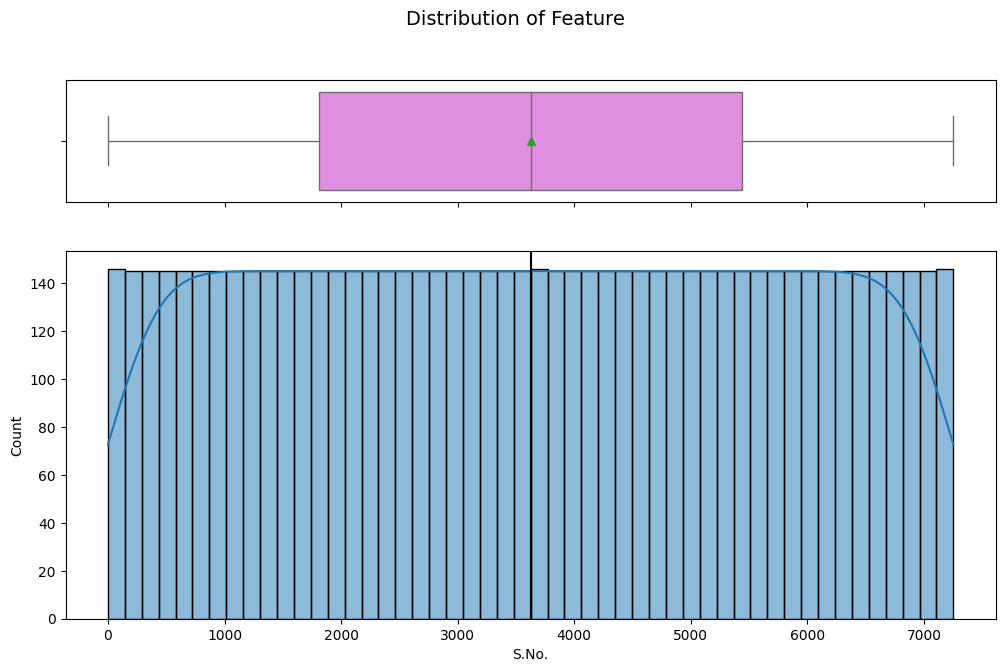

----------------------------------------------------------------------------------------------------------------------------------


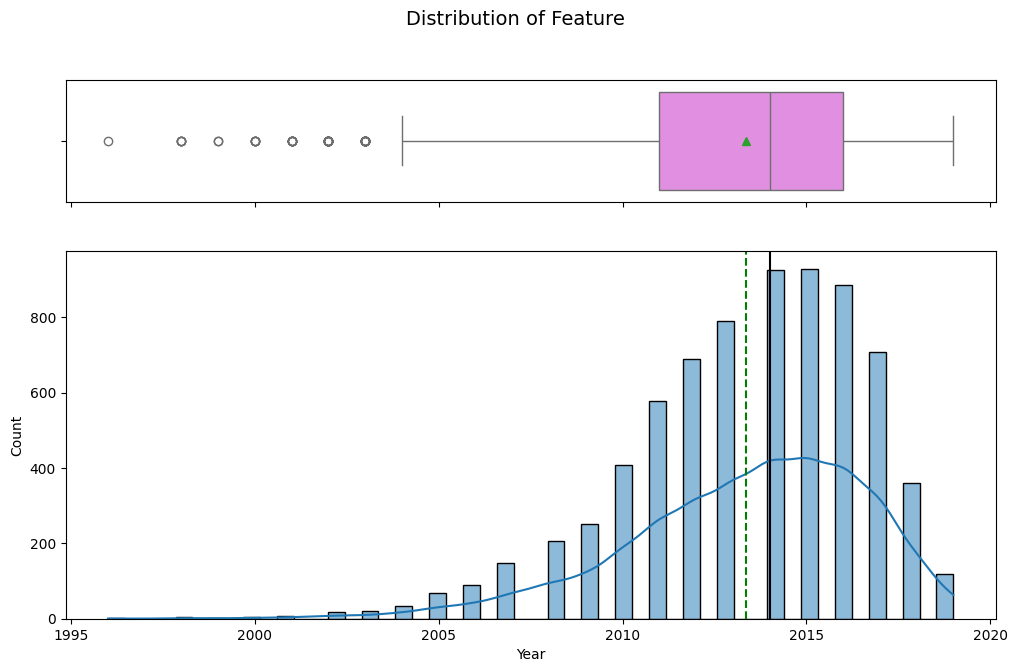

----------------------------------------------------------------------------------------------------------------------------------


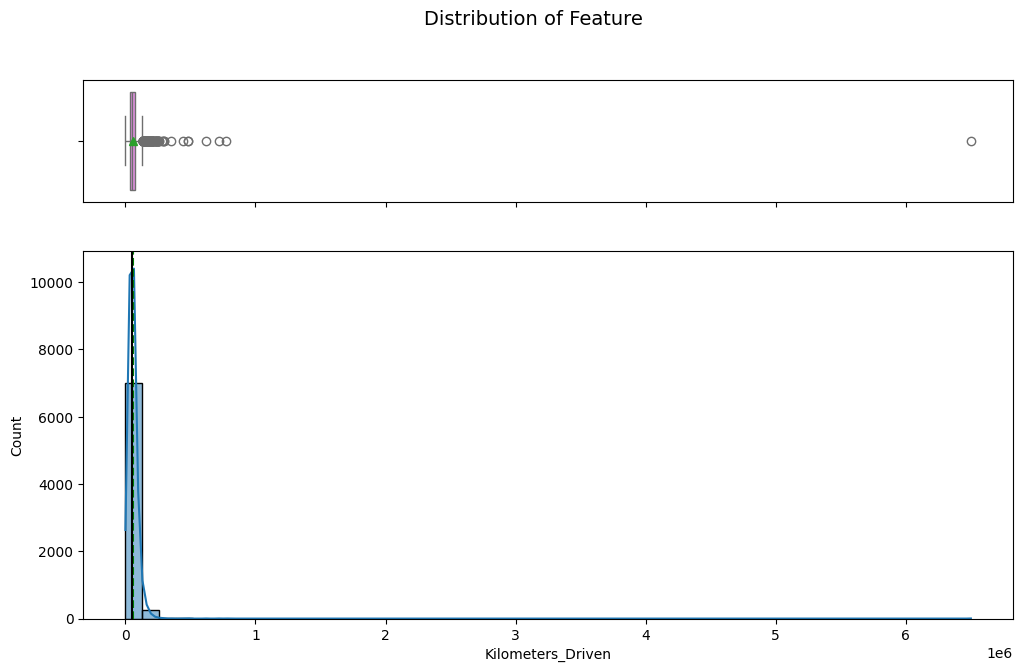

----------------------------------------------------------------------------------------------------------------------------------


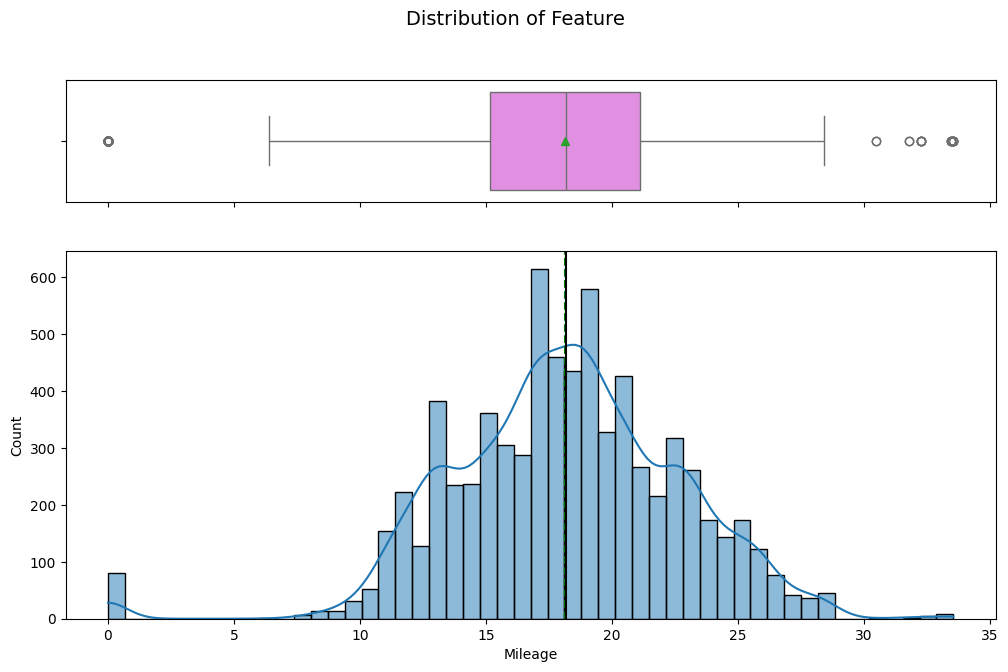

----------------------------------------------------------------------------------------------------------------------------------


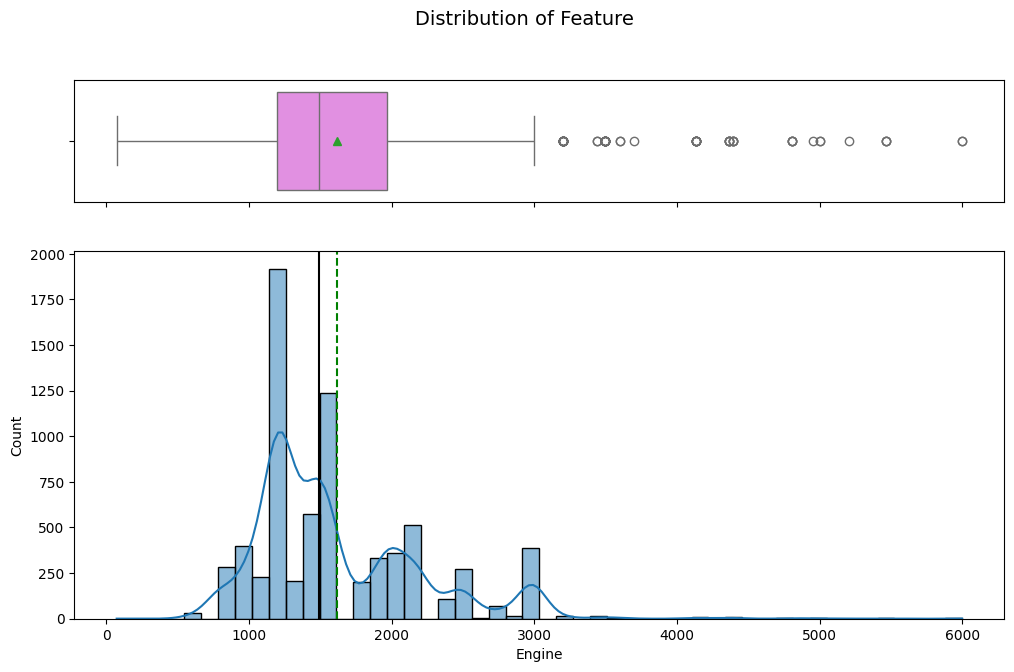

----------------------------------------------------------------------------------------------------------------------------------


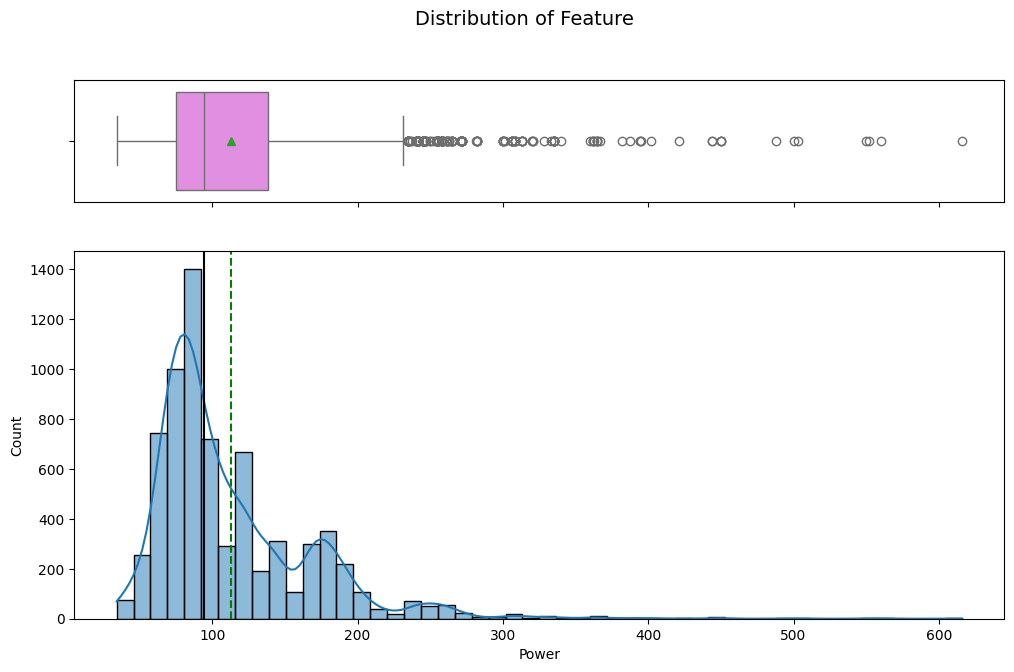

----------------------------------------------------------------------------------------------------------------------------------


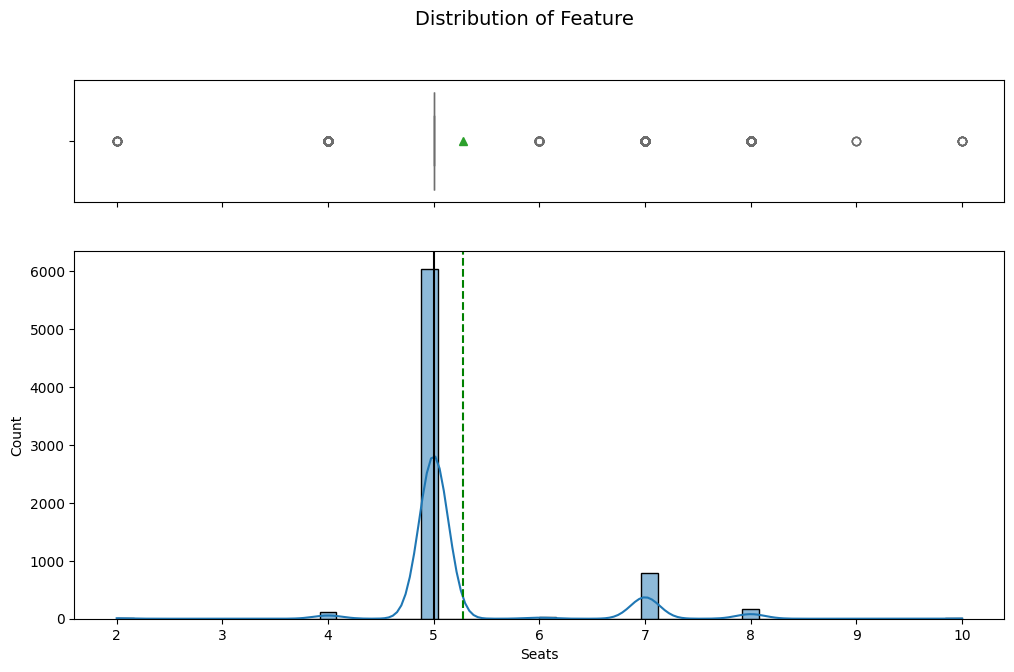

----------------------------------------------------------------------------------------------------------------------------------


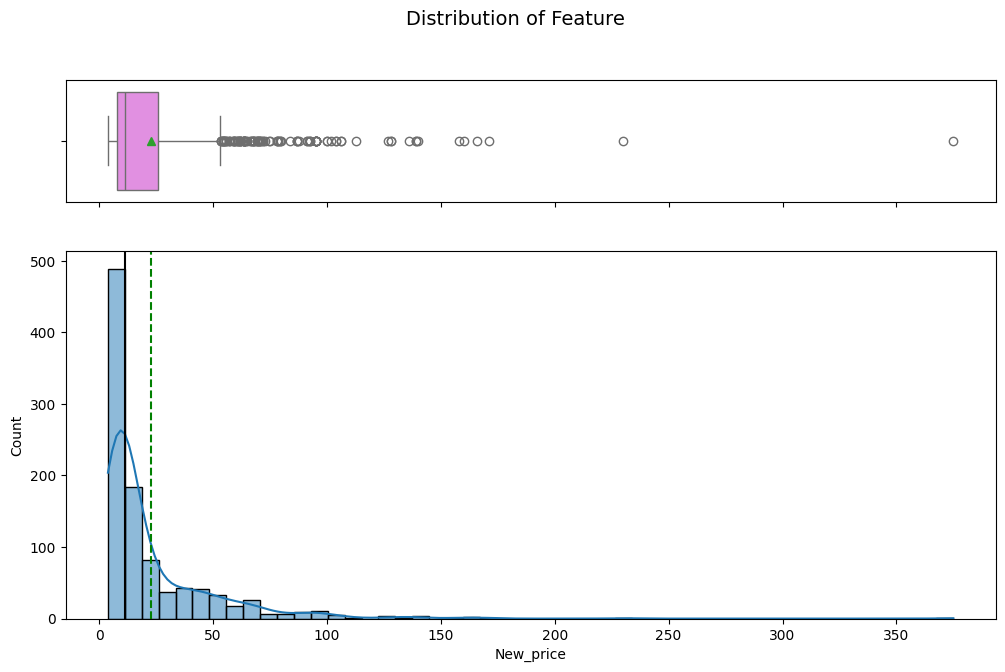

----------------------------------------------------------------------------------------------------------------------------------


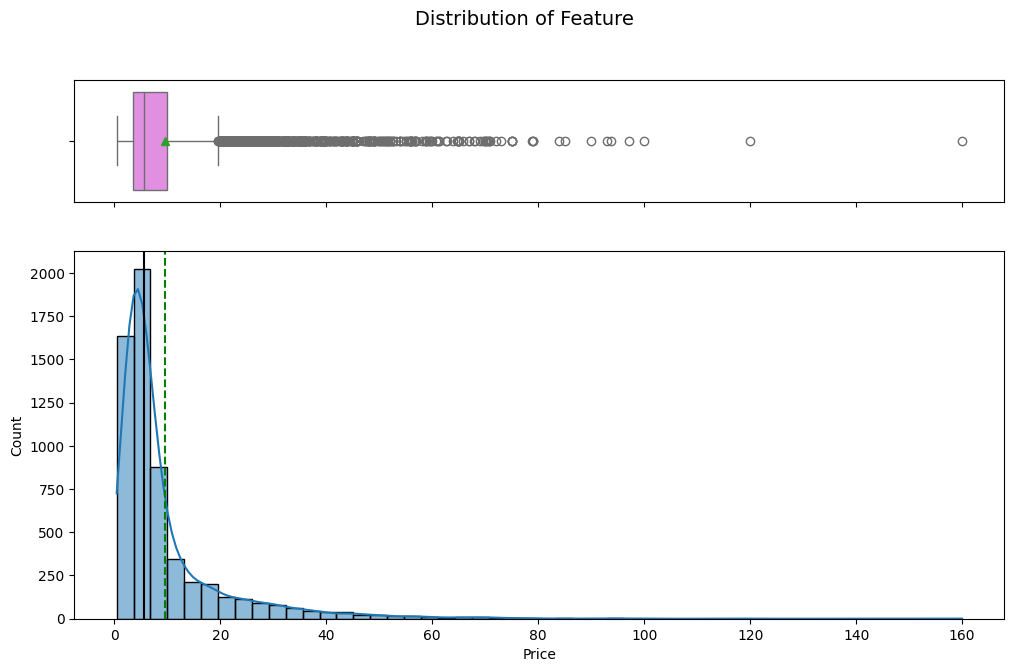

----------------------------------------------------------------------------------------------------------------------------------


In [619]:
# Let's do a quick analysis of the numerical columns
num_cols = data.select_dtypes(include=['number']).columns

for col in num_cols:
  histogram_boxplot(data, col, kde = True, bins = 50)
  plt.show()
  print("-"*130)


#####Observations
*  Serial No is 100% uniqiue and is not valuable to our prediction model.  We should drop it.
*  Year is left-skewed with a few outliers on the older end.
*  There is one huge outlier skewing Kilometers_driven where the value is >6 million.  Perhaps this is bad data?
*  Mileage, Engine and Power all appear to be a right-skewed, near normal distribution with a fair number of outliers.  We'll need to investigate these values carefully.
* Seats is a normal distribution with the vast majority equal to five.  We'll need to investigate the outliers.
* New_price is a highly right-skewed normal distribution with 6247 (82%) missing values.  We will need to decide is we should impune most of these values or drop the column alltogether.  *** This is a candidate for log transformation.***
*  Price is also a highly right-skewed normal distribution but with 1234 (17%) missing values.  This is our target variable.  *** This is a candidate for log transformation.***

Let's process each one of these now.



**Serial Number**

In [620]:
# Dropping serial number as it adds no predictive value.
data = data.drop(['S.No.'], axis=1)

**Year**

Year is a bit left-skewed as more cars in the market are newer than older.  This seems like a correct distribution.

**Kilometers_Driven**

In [621]:
# Print data row where 'Kilometers_Driven' > 6000000
data[data['Kilometers_Driven'] > 6000000]

Name Location  Year  Kilometers_Driven Fuel_Type  \
2328  BMW X5 xDrive 30d M Sport  Chennai  2017            6500000    Diesel   

     Transmission Owner_Type  Mileage  Engine  Power  Seats  New_price  Price  
2328    Automatic      First    15.97  2993.0  258.0    5.0        NaN   65.0

In [622]:
# First, let's deal with this one row with the clearly erroneous 6500000 Km issue.  A 2017
# with is certainly an error and since domain knowledge indicates Km driven is known to
# significantly influence price, mean or median does not seem to be a practical way to handle
# this.  We'll just drop this row.
data = data.drop(data[data['Kilometers_Driven'] > 6000000].index)

In [623]:
# Print data row where 'Kilometers_Driven' > 6000000
data[data['Kilometers_Driven'] > 6000000]

Empty DataFrame
Columns: [Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, New_price, Price]
Index: []

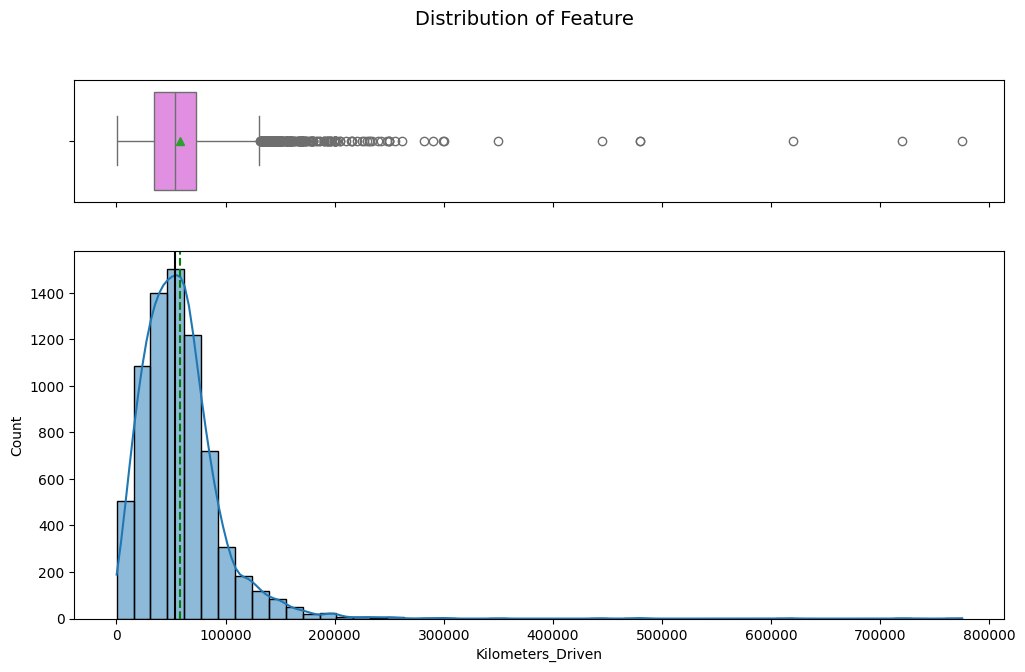

In [624]:
  # Recheck the distribution
  histogram_boxplot(data, 'Kilometers_Driven', kde = True, bins = 50)
  plt.show()

Still heavily right-skewed.  Let's plot Kilometers_Driven against Year to see if there are any obvious abnormalities.

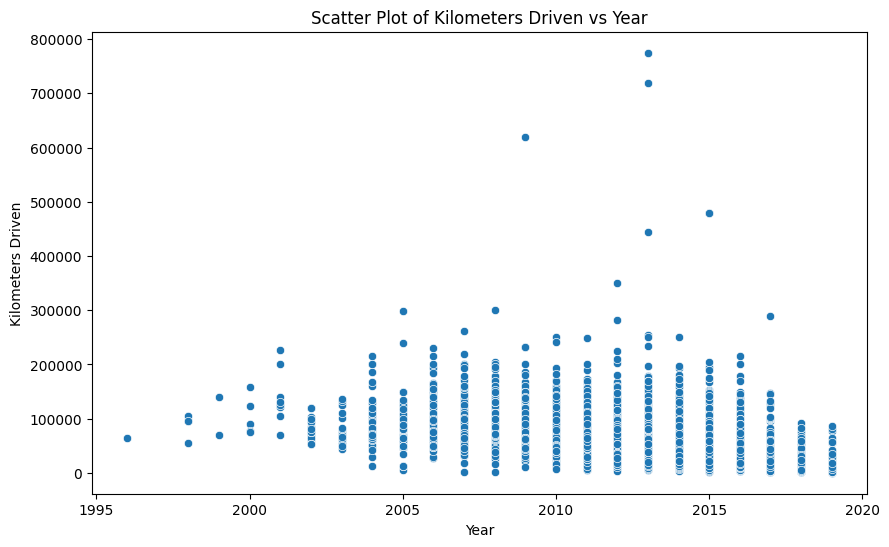

In [625]:
# Scatter plot between Kilometers_Driven and Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Kilometers_Driven', data=data)
plt.title('Scatter Plot of Kilometers Driven vs Year')
plt.xlabel('Year')
plt.ylabel('Kilometers Driven')
plt.show()


There are a few highly driven cars in our data set.  Is it possible that a car gets driven 100,000 KM/year?  I suppose so.  There are not that many so we will leave these alone for now.

**Seats**

In [626]:
# Print rows where seats > 8
data[data['Seats'] > 8]


Name   Location  Year  \
814                     Toyota Qualis FS B2       Pune  2004   
917                            Tata Sumo DX     Mumbai  2013   
1347              Mahindra Scorpio LX BS IV  Bangalore  2007   
1907                    Toyota Qualis FS B3  Bangalore  2002   
2267                    Toyota Qualis RS E2       Pune  2004   
2312        Chevrolet Tavera LT 9 Str BS IV    Kolkata  2012   
2359                  Mahindra Xylo D2 Maxx    Chennai  2016   
2575  Chevrolet Tavera LS B3 10 Seats BSIII  Hyderabad  2015   
6242             Tata Sumo EX 10/7 Str BSII    Chennai  2015   
6288  Chevrolet Tavera LS B3 10 Seats BSIII  Hyderabad  2005   
6875                    Toyota Qualis FS B3       Pune  2002   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
814               77757    Diesel       Manual     Second    13.10  2446.0   
917               20000    Diesel       Manual      First    14.07  1978.0   
1347              74112    Diesel       Manual      First    12.05  2179.0   
1907              63000    Diesel       Manual      Third    13.10  2446.0   
2267             215750    Diesel       Manual     Second     0.00  2446.0   
2312              67132    Diesel       Manual      First    13.58  2499.0   
2359             150000    Diesel       Manual      First    14.95  2489.0   
2575             120000    Diesel       Manual      First    14.80  2499.0   
6242             196000    Diesel       Manual     Second    12.20  1948.0   
6288             150000    Diesel       Manual     Second    14.80  2499.0   
6875             119613    Diesel       Manual     Second    13.10  2446.0   

      Power  Seats  New_price  Price  
814    75.0   10.0        NaN   3.50  
917    83.1   10.0        NaN   5.25  
1347  120.0    9.0        NaN   4.10  
1907   75.0   10.0        NaN   3.65  
2267    NaN   10.0        NaN   3.50  
2312   78.0    9.0        NaN   4.75  
2359   93.7    9.0        NaN   4.50  
2575   80.0   10.0        NaN   5.50  
6242   68.0   10.0        NaN    NaN  
6288   80.0   10.0        NaN    NaN  
6875   75.0   10.0        NaN    NaN

These appear to be valid.

**Mileage, Power, Engine**

In [627]:
# Print rows where Mileage > 30
data[data['Mileage'] > 30]

Name Location  Year  Kilometers_Driven  \
1269  Maruti Alto 800 2016-2019 CNG LXI   Mumbai  2018              10600   
1332             Maruti Wagon R CNG LXI     Pune  2013              79494   
2059             Maruti Wagon R CNG LXI   Mumbai  2013              54000   
2371             Maruti Wagon R CNG LXI     Pune  2014              29202   
2701          Maruti Celerio CNG VXI MT    Kochi  2016              70536   
3119   Maruti Alto K10 LXI CNG Optional    Kochi  2018              44202   
3129             Maruti Wagon R CNG LXI    Delhi  2014              74663   
3553  Maruti Alto 800 2016-2019 CNG LXI     Pune  2015              18000   
3869  Maruti Alto 800 2016-2019 CNG LXI    Delhi  2012              65537   
4141             Maruti Wagon R CNG LXI   Mumbai  2014              47200   
4769  Maruti Alto 800 2016-2019 CNG LXI    Kochi  2017              24310   
5178          Maruti Celerio CNG VXI MT    Delhi  2015              64687   
5710            Maruti Alto 800 CNG LXI   Mumbai  2013              26200   
5935            Maruti Alto K10 LXI CNG     Pune  2015              59525   
6019            Maruti Alto K10 LXI CNG    Delhi  2014              40929   
6538            Maruti Alto K10 LXI CNG    Kochi  2015              47490   
6788   Maruti Alto K10 LXI CNG Optional    Delhi  2017              33000   
6958            Maruti Alto 800 CNG LXI  Kolkata  2013              14311   

     Fuel_Type Transmission Owner_Type  Mileage  Engine  Power  Seats  \
1269       CNG       Manual      First    33.44   796.0  40.30    4.0   
1332       CNG       Manual      First    33.54   998.0  67.04    5.0   
2059       CNG       Manual      First    33.54   998.0  67.04    5.0   
2371       CNG       Manual      First    33.54   998.0  67.04    5.0   
2701       CNG       Manual      First    31.79   998.0  58.33    5.0   
3119       CNG       Manual      First    32.26   998.0  58.20    4.0   
3129       CNG       Manual      First    33.54   998.0  67.04    5.0   
3553       CNG       Manual      First    33.44   796.0  40.30    4.0   
3869       CNG       Manual     Second    33.44   796.0  40.30    4.0   
4141       CNG       Manual      First    33.54   998.0  67.04    5.0   
4769       CNG       Manual      First    33.44   796.0  40.30    4.0   
5178       CNG       Manual      First    31.79   998.0  58.33    5.0   
5710       CNG       Manual      First    30.46   796.0  47.30    5.0   
5935       CNG       Manual     Second    32.26   998.0  58.20    4.0   
6019       CNG       Manual      First    32.26   998.0  58.20    4.0   
6538       CNG       Manual      First    32.26   998.0  58.20    4.0   
6788       CNG       Manual      First    32.26   998.0  58.20    4.0   
6958       CNG       Manual      First    30.46   796.0  47.30    5.0   

      New_price  Price  
1269        NaN   3.50  
1332       5.54   2.96  
2059       5.58   3.05  
2371       5.54   3.90  
2701       5.87   4.58  
3119       4.66   4.00  
3129       5.35   3.25  
3553        NaN   3.00  
3869        NaN   2.10  
4141       5.58   2.85  
4769        NaN   3.70  
5178       5.87   3.80  
5710        NaN   2.15  
5935        NaN   3.10  
6019        NaN    NaN  
6538        NaN    NaN  
6788       4.66    NaN  
6958        NaN    NaN

In [628]:
# Print rows where Power > 400
data[data['Power'] > 400]

Name    Location  Year  Kilometers_Driven  \
70    Porsche Cayenne 2009-2014 Turbo      Mumbai  2008              73000   
148                    Audi RS5 Coupe      Mumbai  2013              23000   
2100          Porsche Cayenne Turbo S      Mumbai  2010              35000   
3341     BMW 7 Series 2007-2012 750Li       Kochi  2010              50161   
4061                   Audi RS5 Coupe      Mumbai  2013              23312   
4627          BMW 6 Series 650i Coupe       Kochi  2010              65329   
4691   Mercedes-Benz SLK-Class 55 AMG   Bangalore  2014               3000   
4821          BMW 6 Series 630i Coupe      Mumbai  2011               5900   
5088  Jaguar XJ 5.0 L V8 Supercharged  Coimbatore  2011              43686   
5521  Bentley Continental Flying Spur   Hyderabad  2006              48000   
5781       Lamborghini Gallardo Coupe       Delhi  2011               6500   
5919           Jaguar F Type 5.0 V8 S   Hyderabad  2015               8000   
6354          Bentley Flying Spur W12   Bangalore  2008              31200   
7057          BMW 6 Series 650i Coupe       Delhi  2009              64000   

     Fuel_Type Transmission Owner_Type  Mileage  Engine  Power  Seats  \
70      Petrol    Automatic      First     8.50  4806.0  500.0    5.0   
148     Petrol    Automatic      First    11.05  2894.0  444.0    4.0   
2100    Petrol    Automatic     Second    11.90  4806.0  550.0    5.0   
3341    Petrol    Automatic      First     8.77  4395.0  402.0    5.0   
4061    Petrol    Automatic      First    11.05  2894.0  444.0    4.0   
4627    Petrol    Automatic      First     7.94  4395.0  450.0    4.0   
4691    Petrol    Automatic     Second    12.00  5461.0  421.0    2.0   
4821    Petrol    Automatic      First     7.94  4395.0  450.0    4.0   
5088    Petrol    Automatic      First    10.50  5000.0  503.0    4.0   
5521    Petrol    Automatic      First     8.60  5998.0  552.0    4.0   
5781    Petrol    Automatic      Third     6.40  5204.0  560.0    2.0   
5919    Petrol    Automatic      First    12.50  5000.0  488.1    2.0   
6354    Petrol    Automatic     Second    10.20  5998.0  616.0    5.0   
7057    Petrol    Automatic      First     7.94  4395.0  450.0    4.0   

      New_price   Price  
70          NaN   14.50  
148       128.0   37.00  
2100        NaN   32.00  
3341        NaN   25.93  
4061      128.0   40.50  
4627        NaN   20.72  
4691        NaN   90.00  
4821        NaN   47.50  
5088        NaN   50.66  
5521        NaN   59.00  
5781        NaN  120.00  
5919        NaN  100.00  
6354      375.0     NaN  
7057        NaN     NaN

In [629]:
# Print rows where Engine > 4000
data[data['Engine'] > 4000]

Name    Location  Year  \
70                    Porsche Cayenne 2009-2014 Turbo      Mumbai  2008   
152             Mercedes-Benz S Class 2005 2013 S 500     Kolkata  2010   
459                Audi Q7 4.2 TDI Quattro Technology  Coimbatore  2016   
586                Audi Q7 4.2 TDI Quattro Technology       Kochi  2014   
1038             Land Rover Range Rover TDV8 (Diesel)   Bangalore  2011   
1093               Audi Q7 4.2 TDI Quattro Technology   Bangalore  2014   
1352  Land Rover Range Rover 3.6 TDV8 Vogue SE Diesel   Bangalore  2012   
1596                          Audi Q7 4.2 FSI quattro       Delhi  2008   
2100                          Porsche Cayenne Turbo S      Mumbai  2010   
2978                    Porsche Panamera 2010 2013 4S  Coimbatore  2010   
3242         Land Rover Range Rover Vogue SE 4.4 SDV8   Bangalore  2012   
3341                     BMW 7 Series 2007-2012 750Li       Kochi  2010   
4388               Audi Q7 4.2 TDI Quattro Technology   Bangalore  2015   
4451                                  Ford Mustang V8       Kochi  2018   
4559               Audi Q7 4.2 TDI Quattro Technology       Delhi  2010   
4627                          BMW 6 Series 650i Coupe       Kochi  2010   
4691                   Mercedes-Benz SLK-Class 55 AMG   Bangalore  2014   
4722                    Mercedes-Benz SL-Class SL 500     Kolkata  2010   
4821                          BMW 6 Series 630i Coupe      Mumbai  2011   
4869         Land Rover Range Rover 3.6 TDV8 Vogue SE  Coimbatore  2012   
4938               Audi Q7 4.2 TDI Quattro Technology  Coimbatore  2015   
5088                  Jaguar XJ 5.0 L V8 Supercharged  Coimbatore  2011   
5341                         Porsche Cayenne S Diesel  Coimbatore  2016   
5416         Land Rover Range Rover Vogue SE 4.4 SDV8  Coimbatore  2013   
5521                  Bentley Continental Flying Spur   Hyderabad  2006   
5603                Porsche Panamera 2010 2013 Diesel       Delhi  2013   
5781                       Lamborghini Gallardo Coupe       Delhi  2011   
5919                           Jaguar F Type 5.0 V8 S   Hyderabad  2015   
6354                          Bentley Flying Spur W12   Bangalore  2008   
7057                          BMW 6 Series 650i Coupe       Delhi  2009   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
70                73000    Petrol    Automatic      First     8.50  4806.0   
152               35277    Petrol    Automatic      First     7.81  5461.0   
459               51002    Diesel    Automatic      First    11.33  4134.0   
586               79926    Diesel    Automatic      First    11.33  4134.0   
1038              55000    Diesel    Automatic      First    10.20  4367.0   
1093              50000    Diesel    Automatic      First    11.33  4134.0   
1352              66538    Diesel    Automatic      First    10.20  4367.0   
1596              71000    Petrol    Automatic      First     8.30  4134.0   
2100              35000    Petrol    Automatic     Second    11.90  4806.0   
2978              42400    Petrol    Automatic      Third     8.00  4806.0   
3242              63000    Diesel    Automatic     Second    11.49  4367.0   
3341              50161    Petrol    Automatic      First     8.77  4395.0   
4388              50000    Diesel    Automatic      First    11.33  4134.0   
4451              21290    Petrol    Automatic      First    13.00  4951.0   
4559              73000    Diesel    Automatic      First    11.33  4134.0   
4627              65329    Petrol    Automatic      First     7.94  4395.0   
4691               3000    Petrol    Automatic     Second    12.00  5461.0   
4722              35000    Petrol    Automatic      First     8.10  5461.0   
4821               5900    Petrol    Automatic      First     7.94  4395.0   
4869              84384    Diesel    Automatic      First    10.20  4367.0   
4938              56238    Diesel    Automatic      First    11.33  4134.0   
5088   

These all seem valid.  Lots of missing values in these columns which we will deal with below.

**New_price and Price**

In [630]:
# Print rows where New_price > 100
data[data['New_price'] > 100]

Name    Location  Year  \
148                                  Audi RS5 Coupe      Mumbai  2013   
327               Audi Q7 45 TDI Quattro Technology  Coimbatore  2017   
1336              Audi Q7 45 TDI Quattro Technology      Mumbai  2016   
1505                Land Rover Range Rover Sport SE       Kochi  2019   
1885           Mercedes-Benz GLS 350d Grand Edition       Delhi  2018   
2056                    BMW 7 Series 730Ld Eminence       Kochi  2015   
2095                       Mercedes-Benz SLC 43 AMG  Coimbatore  2019   
2178        Land Rover Discovery HSE Luxury 3.0 TD6      Mumbai  2017   
2528                Land Rover Discovery SE 3.0 TD6       Delhi  2016   
3132                           Porsche Cayenne Base       Kochi  2019   
3199  BMW 7 Series 730Ld Design Pure Excellence CBU     Kolkata  2012   
3752               Land Rover Range Rover Sport HSE       Kochi  2015   
4061                                 Audi RS5 Coupe      Mumbai  2013   
4079    Land Rover Range Rover 3.0 Diesel LWB Vogue   Hyderabad  2017   
4778                  Mercedes-Benz S-Class S 350 d   Bangalore  2011   
5545                Land Rover Range Rover Sport SE       Delhi  2014   
6212               BMW 7 Series 730Ld DPE Signature     Chennai  2017   
6354                        Bentley Flying Spur W12   Bangalore  2008   
6960                       Mercedes-Benz SLC 43 AMG  Coimbatore  2018   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
148               23000    Petrol    Automatic      First    11.05  2894.0   
327               97430    Diesel    Automatic      First    14.75  2967.0   
1336              20002    Diesel    Automatic      First    14.75  2967.0   
1505              26013    Diesel    Automatic      First    12.65  2993.0   
1885               6000    Diesel    Automatic      First    11.00  2987.0   
2056              29966    Diesel    Automatic     Second    16.77  2993.0   
2095               2526    Petrol    Automatic      First    19.00  2996.0   
2178              35000    Diesel    Automatic      First    18.00  2993.0   
2528              59000    Diesel    Automatic      First    18.00  2993.0   
3132              14298    Petrol    Automatic      First    13.33  2995.0   
3199              41100    Diesel    Automatic      First    16.77  2993.0   
3752              38467    Diesel    Automatic      First    12.65  2993.0   
4061              23312    Petrol    Automatic      First    11.05  2894.0   
4079              25000    Diesel    Automatic      First    13.33  2993.0   
4778              47140    Diesel    Automatic     Second    13.50  2925.0   
5545              47000    Diesel    Automatic     Second    12.65  2993.0   
6212              16000    Diesel    Automatic      First    16.77  2993.0   
6354              31200    Petrol    Automatic     Second    10.20  5998.0   
6960              18338    Petrol    Automatic      First    19.00  2996.0   

       Power  Seats  New_price   Price  
148   444.00    4.0      128.0   37.00  
327   245.00    7.0      104.0   62.67  
1336  245.00    7.0      104.0   67.00  
1505  255.00    5.0      139.0   97.07  
1885  258.00    7.0      102.0   79.00  
2056  261.49    5.0      140.0   43.60  
2095  362.07    2.0      106.0   83.96  
2178  255.00    7.0      127.0   41.60  
2528  255.00    7.0      113.0   36.75  
3132  340.00    5.0      136.0    2.02  
3199  261.49    5.0      166.0   26.50  
3752  255.00    5.0      160.0   70.66  
4061  444.00    4.0      128.0   40.50  
4079  255.00    5.0      230.0  160.00  
4778  281.61    5.0      171.0   30.00  
5545  255.00    5.0      139.0   64.75  
6212  261.49    5.0      158.0     NaN  
6354  616.00    5.0      375.0     NaN  
6960  362.07    2.0      106.0     NaN

In [631]:
# Print rows where Price > 80, sorted by Price
filtered_data = data[data['Price'] > 80].sort_values('Price', ascending=False)
filtered_data

Name    Location  Year  \
4079  Land Rover Range Rover 3.0 Diesel LWB Vogue   Hyderabad  2017   
5781                   Lamborghini Gallardo Coupe       Delhi  2011   
5919                       Jaguar F Type 5.0 V8 S   Hyderabad  2015   
1505              Land Rover Range Rover Sport SE       Kochi  2019   
1974                           BMW 7 Series 740Li  Coimbatore  2018   
1984                           BMW 7 Series 740Li   Bangalore  2017   
4691               Mercedes-Benz SLK-Class 55 AMG   Bangalore  2014   
5535                    BMW X6 xDrive 40d M Sport   Ahmedabad  2015   
2095                     Mercedes-Benz SLC 43 AMG  Coimbatore  2019   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
4079              25000    Diesel    Automatic      First    13.33  2993.0   
5781               6500    Petrol    Automatic      Third     6.40  5204.0   
5919               8000    Petrol    Automatic      First    12.50  5000.0   
1505              26013    Diesel    Automatic      First    12.65  2993.0   
1974              28060    Petrol    Automatic      First    12.05  2979.0   
1984              17465    Petrol    Automatic      First    12.05  2979.0   
4691               3000    Petrol    Automatic     Second    12.00  5461.0   
5535              97003    Diesel    Automatic      First    15.87  2993.0   
2095               2526    Petrol    Automatic      First    19.00  2996.0   

       Power  Seats  New_price   Price  
4079  255.00    5.0      230.0  160.00  
5781  560.00    2.0        NaN  120.00  
5919  488.10    2.0        NaN  100.00  
1505  255.00    5.0      139.0   97.07  
1974  320.00    5.0        NaN   93.67  
1984  320.00    5.0        NaN   93.00  
4691  421.00    2.0        NaN   90.00  
5535  308.43    5.0        NaN   85.00  
2095  362.07    2.0      106.0   83.96

In [632]:
# Print total number of rows
total_rows = len(filtered_data)
print(f"\nTotal number of rows: {total_rows}")


Total number of rows: 9


In [633]:
# Print rows where Price <=0
data[data['Price'] <= .5]

Name Location  Year  Kilometers_Driven Fuel_Type  \
1628  Maruti 800 Std BSIII   Jaipur  2004              12000    Petrol   
1713          Tata Nano Lx     Pune  2011              65000    Petrol   
2605          Tata Nano Cx   Jaipur  2010              57000    Petrol   
2847      Hyundai Getz GLS     Pune  2005              86000    Petrol   
3138        Maruti Zen LXI   Jaipur  1998              95150    Petrol   
3228        Maruti 800 Std     Pune  2003              52000    Petrol   

     Transmission Owner_Type  Mileage  Engine  Power  Seats  New_price  Price  
1628       Manual     Second     16.1   796.0   37.0    4.0        NaN   0.45  
1713       Manual     Second     26.0   624.0   35.0    4.0        NaN   0.44  
2605       Manual      First     26.0   624.0   35.0    4.0        NaN   0.50  
2847       Manual     Second     15.3  1341.0   83.0    5.0        NaN   0.45  
3138       Manual      Third     17.3   993.0   60.0    5.0        NaN   0.45  
3228       Manual      First     16.1   796.0   37.0    4.0        NaN   0.50

These all seem reasonable.  Lots of **missng values** in these columns too which we will deal with below.  Both **Price and New_price are candiates for log transformation** however we will address this below when we start building our models.

####**Categorical Variables**

In [634]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])            # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )                              # Percentage of each class of the category
        else:
            label = p.get_height()         # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()                 # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )                                 # Annotate the percentage

    plt.show()                            # Show the plot

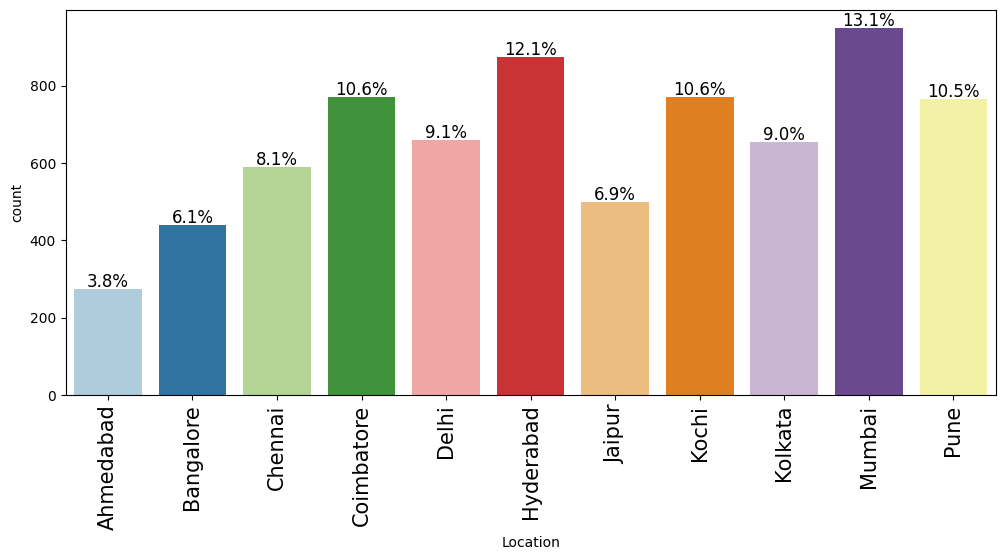

----------------------------------------------------------------------------------------------------------------------------------


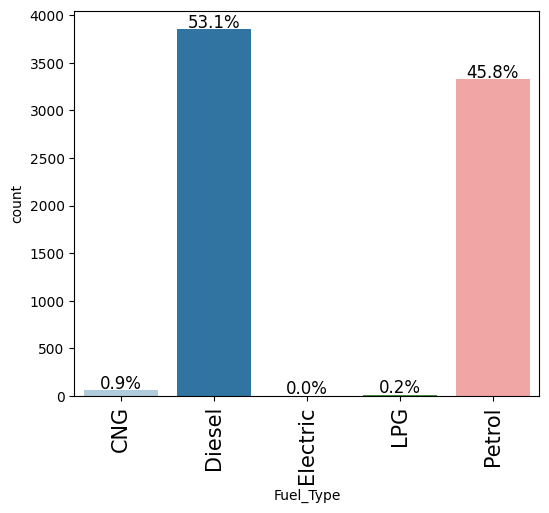

----------------------------------------------------------------------------------------------------------------------------------


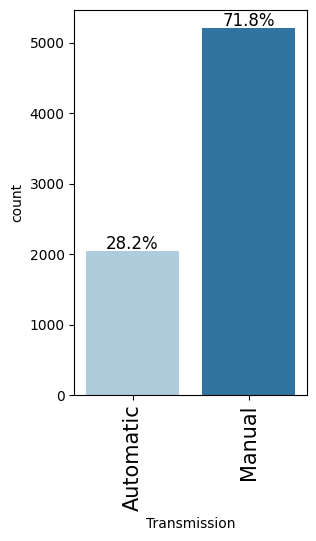

----------------------------------------------------------------------------------------------------------------------------------


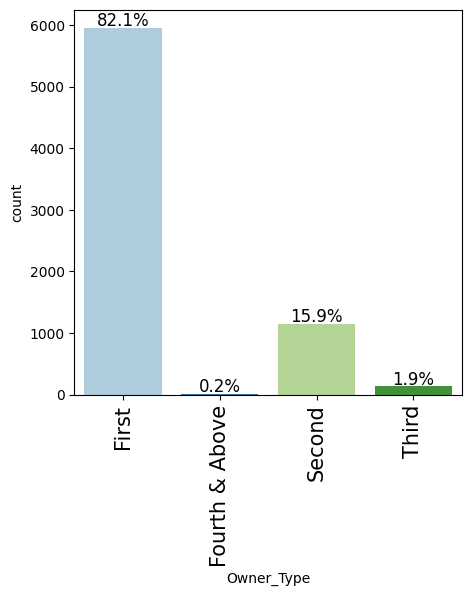

----------------------------------------------------------------------------------------------------------------------------------


In [635]:
# Let's do a quick analysis of the categorical columns
cat_cols = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

for col in cat_cols:
  labeled_barplot(data, col, perc = True)
  plt.show()
  print("-"*130)

#####Observations

* There are 11 different location markets represented in our data set where Mumbai is the most prevelant.
* There are four different fuel types represented with Diesel and Gas representing the vast majority.  There are more Diesel than Gas.
* The majority of cars (71%) have a manual transmission.
* The majority of cars (82%) are one-owner cars.


### **Feature Engineering**

Since there are 2041 Name combinations, it seems our data is littered with many different descriptive models.  Name is composed of make and model of each car, it might be useful do a little feature engineering to separate brand name and model from the Name column.  

In [636]:
data['Make'] = data['Name'].str.split().str[0]  # Extract the make from the 'Name' column
data['Make'] = data['Make'].str.replace('ISUZU', 'Isuzu')   # Clean up Isuzu

In [637]:
data['Make'] = data['Make']\
.str.replace('Land', 'Land Rover')\
.str.replace('Mini', 'Mini Cooper')\
.str.replace('Hindustan', 'Hindustan Motors')

In [638]:
sorted(data['Make'].unique())

['Ambassador',
 'Audi',
 'BMW',
 'Bentley',
 'Chevrolet',
 'Datsun',
 'Fiat',
 'Force',
 'Ford',
 'Hindustan Motors',
 'Honda',
 'Hyundai',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Lamborghini',
 'Land Rover',
 'Mahindra',
 'Maruti',
 'Mercedes-Benz',
 'Mini Cooper',
 'Mitsubishi',
 'Nissan',
 'OpelCorsa',
 'Porsche',
 'Renault',
 'Skoda',
 'Smart',
 'Tata',
 'Toyota',
 'Volkswagen',
 'Volvo']

In [639]:
# Extract the model from the 'Name' column
data['Model'] = data['Name'].str.split().str[1:].str.join(' ')

# Replace only the 2nd occurrence of 'Rover' from data['Model']
data['Model'] = data['Model'].str.replace('Rover', ' ', n=1).str.replace('  ', ' ').str.strip()
print(data['Model'][data['Make'] == 'Land Rover'].unique())

# Replace only the 2nd occurrence of 'Cooper' from data['Model']
data['Model'] = data['Model'].str.replace('Cooper', ' ', n=1).str.replace('  ', ' ').str.strip()
print(data['Model'][data['Make'] == 'Mini Cooper'].unique())

# Replace only the 2nd occurrence of 'Motors' from data['Model']
data['Model'] = data['Model'].str.replace('Motors', ' ', n=1).str.replace('  ', ' ').str.strip()
print(data['Model'][data['Make'] == 'Hindustan Motors'].unique())

['Range Rover 2.2L Pure' 'Freelander 2 TD4 SE' 'Range Rover 2.2L Dynamic'
 'Range Rover HSE Dynamic' 'Range Rover 2.2L Prestige'
 'Range Rover Evoque 2.0 TD4 Pure' 'Freelander 2 SE' 'Range Rover 3.0 D'
 'Range Rover Evoque 2.0 TD4 HSE Dynamic' 'Range Rover TDV8 (Diesel)'
 'Freelander 2 HSE' 'Freelander 2 TD4 S' 'Discovery 4 TDV6 SE'
 'Range Rover 3.6 TDV8 Vogue SE Diesel'
 'Range Rover Sport 2005 2012 Sport' 'Range Rover Sport SE'
 'Discovery Sport TD4 HSE 7S' 'Discovery HSE Luxury 3.0 TD6'
 'Range Rover Sport 2005 2012 HSE' 'Discovery SE 3.0 TD6'
 'Discovery Sport TD4 HSE' 'Range Rover Vogue SE 4.4 SDV8'
 'Freelander 2 HSE SD4' 'Discovery Sport SD4 HSE Luxury 7S'
 'Range Rover Sport HSE' 'Discovery 3 TDV6 Diesel Automatic'
 'Range Rover 3.0 Diesel LWB Vogue' 'Range Rover 3.6 TDV8 Vogue SE'
 'Discovery Sport TD4 S' 'Freelander 2 TD4 HSE'
 'Discovery Sport SD4 HSE Luxury' 'Freelander 2 S Business Edition'
 'Range Rover HSE' 'Discovery 4 SDV6 SE' 'Discovery 4 TDV6 Auto Diesel']
['Country

In [640]:
# Create a numerical column for the age of the car based on model year
data['Age'] = 2024 - data['Year']
data = data.drop(['Year'], axis=1)

In [641]:
# Check the data types for all the columns as well as for missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7252 non-null   object 
 1   Location           7252 non-null   object 
 2   Kilometers_Driven  7252 non-null   int64  
 3   Fuel_Type          7252 non-null   object 
 4   Transmission       7252 non-null   object 
 5   Owner_Type         7252 non-null   object 
 6   Mileage            7250 non-null   float64
 7   Engine             7206 non-null   float64
 8   Power              7077 non-null   float64
 9   Seats              7199 non-null   float64
 10  New_price          1006 non-null   float64
 11  Price              6018 non-null   float64
 12  Make               7252 non-null   object 
 13  Model              7252 non-null   object 
 14  Age                7252 non-null   int64  
dtypes: float64(6), int64(2), object(7)
memory usage: 906.5+ KB


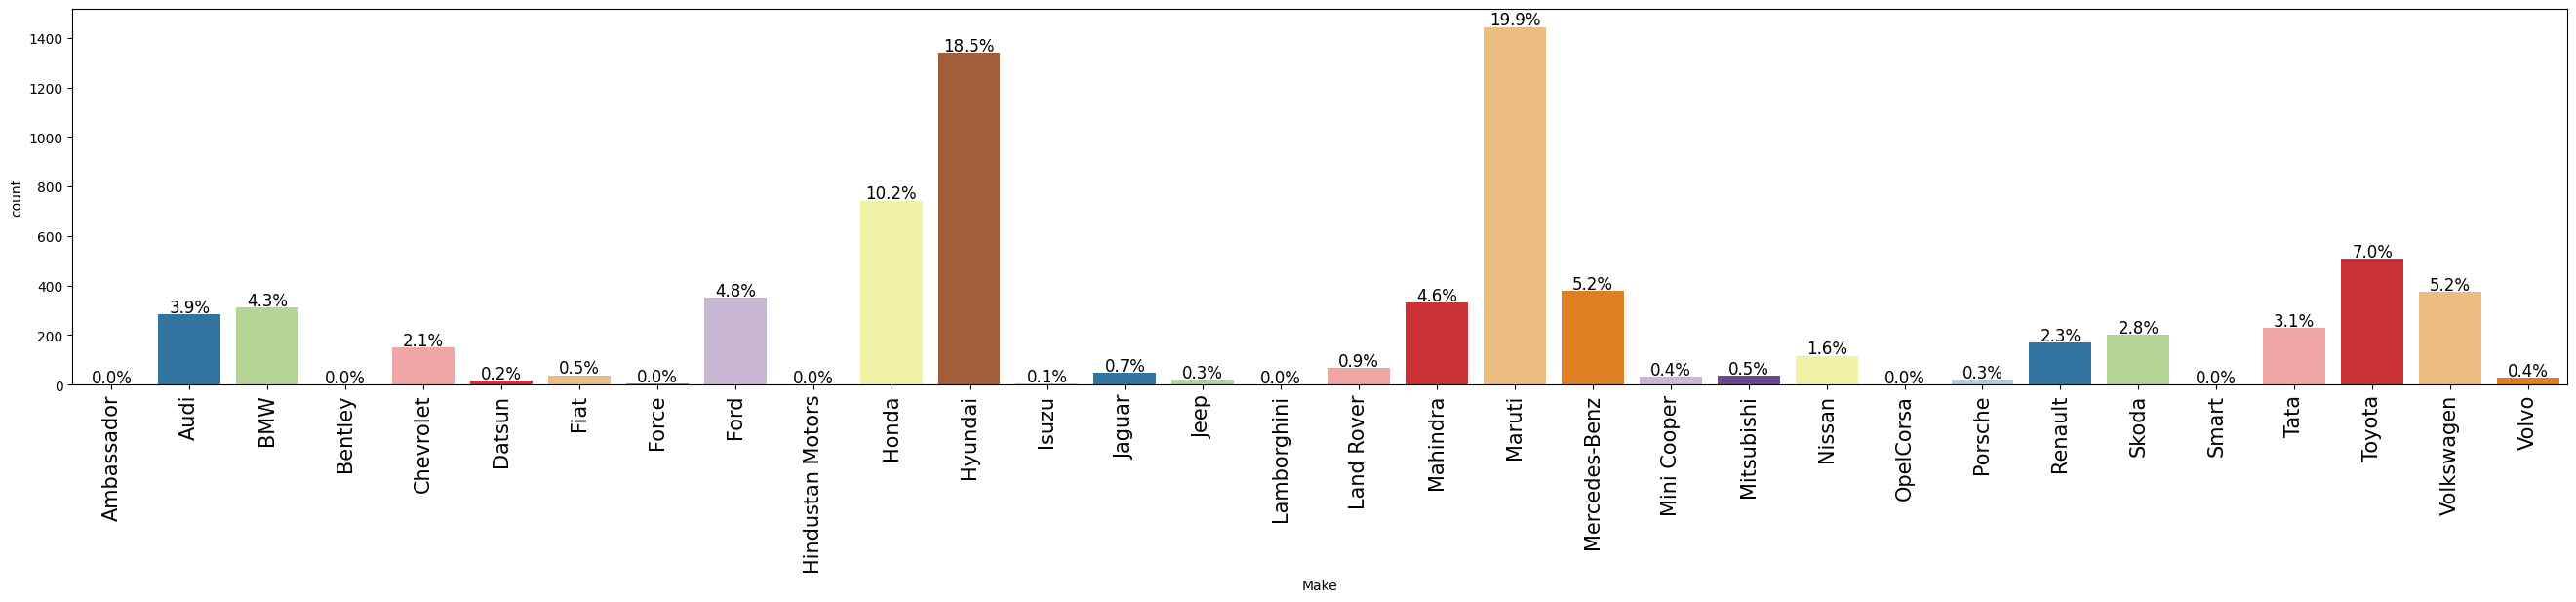

----------------------------------------------------------------------------------------------------------------------------------


In [642]:
# Making a list of the engineered variables
newcols = ['Make']

for col in newcols:
  labeled_barplot(data, col, perc = True)
  plt.show()
  print("-"*130)

In [643]:
makes = data.groupby(['Make'])['Price'].agg({'max'}).sort_values(by='max', ascending = False)
print(makes)

                     max
Make                    
Land Rover        160.00
Lamborghini       120.00
Jaguar            100.00
BMW                93.67
Mercedes-Benz      90.00
Porsche            75.00
Audi               72.94
Bentley            59.00
Ford               56.80
Mini Cooper        39.75
Toyota             35.82
Volvo              32.50
Mitsubishi         28.00
Skoda              27.30
Volkswagen         24.90
Jeep               23.91
Hyundai            23.00
Isuzu              20.00
Tata               17.85
Mahindra           17.63
Honda              17.50
Renault            14.01
Force              12.00
Maruti             11.50
Chevrolet           9.87
Nissan              8.92
Fiat                7.71
Datsun              3.95
Smart               3.00
Ambassador          1.35
Hindustan Motors     NaN
OpelCorsa            NaN


In [644]:
# Creating brand class looking at the max price.
Luxury = ['Land Rover',
        'Lamborghini',
        'Jaguar',
        'BMW',
        'Mercedes-Benz',
        'Porsche',
        'Audi',
        'Bentley',
        'Ford']

Mid = ['Mini Cooper',
        'Toyota',
        'Volvo',
        'Mitsubishi',
        'Skoda',
        'Volkswagen',
        'Jeep',
        'Hyundai']

Economy = ['Isuzu',
        'Tata',
        'Mahindra',
        'Honda',
        'Renault',
        'Force',
        'Maruti',
        'Chevrolet',
        'Nissan',
        'Fiat',
        'Datsun',
        'Smart',
        'Ambassador',
        'Hindustan Motors',
        'OpelCorsa']

In [645]:
# Function to create brand class column using the above list
def classify(brand):
    if brand in Luxury:
        return 'Luxury'
    elif brand in Mid:
        return 'Mid'
    elif brand in Economy:
        return 'Economy'
    else:
        return 'is_missing'

In [646]:
data['Class'] = data['Make'].apply(lambda brand: classify(brand))

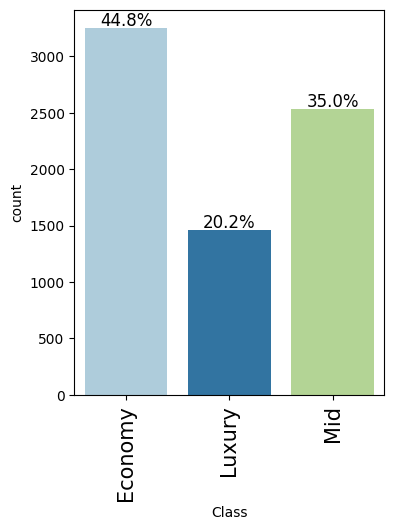

----------------------------------------------------------------------------------------------------------------------------------


In [647]:
# Let's do a quick analysis of the categorical columns
cat_cols = ['Class']

for col in cat_cols:
  labeled_barplot(data, col, perc = True)
  plt.show()
  print("-"*130)

In [648]:
# Filter the DataFrame to show rows where 'Mileage', 'Engine', or 'Power' are
# zero or null.  We have to somehow deal with these.
filtered_data = data[(data['Mileage'] == 0) | (data['Mileage'].isnull()) |
                     (data['Engine'] == 0) | (data['Engine'].isnull()) |
                     (data['Power'] == 0) | (data['Power'].isnull())]

# Select only the columns 'Make', 'Model', 'Mileage', 'Engine', and 'Power'
result = filtered_data[['Make', 'Model', 'Mileage', 'Engine', 'Power']]

# Print the sorted dataFrame by 'Make' and then by 'Model'
print(result.sort_values(by=['Make', 'Model']))



            Make                         Model  Mileage  Engine  Power
3999        Audi  A4 3.2 FSI Tiptronic Quattro    10.50  3197.0    NaN
3093        Audi        A7 2011-2015 Sportback     0.00  2967.0  241.4
2530         BMW           5 Series 520d Sedan    18.48     NaN    NaN
2623         BMW           5 Series 520d Sedan    18.48     NaN    NaN
3272         BMW           5 Series 520d Sedan    18.48     NaN    NaN
...          ...                           ...      ...     ...    ...
6902      Toyota                  Etios Liva V    18.30     NaN    NaN
4904      Toyota            Prius 2009-2016 Z4      NaN  1798.0   73.0
5647      Toyota               Qualis Fleet A3     0.00  2446.0    NaN
2267      Toyota                  Qualis RS E2     0.00  2446.0    NaN
424   Volkswagen     Jetta 2007-2011 1.9 L TDI     0.00  1968.0    NaN

[213 rows x 5 columns]


In [649]:
# Print the number of unique values in each of the columns
for col in data.columns:
  print(f"Column {col} has {data[col].nunique()} unique values.")

Column Name has 2041 unique values.
Column Location has 11 unique values.
Column Kilometers_Driven has 3659 unique values.
Column Fuel_Type has 5 unique values.
Column Transmission has 2 unique values.
Column Owner_Type has 4 unique values.
Column Mileage has 438 unique values.
Column Engine has 150 unique values.
Column Power has 383 unique values.
Column Seats has 8 unique values.
Column New_price has 625 unique values.
Column Price has 1373 unique values.
Column Make has 32 unique values.
Column Model has 2040 unique values.
Column Age has 23 unique values.
Column Class has 3 unique values.


####**Observations**

* There are 32 different Makes and 2040 different Models.
* There are five different fuel types including CNG, LPG, Electric, although 98.9% are Gas and Diesel.
* 11 differrent locations.
* Two different transmissions (Manual, Automatic).
* Four different Owner although 82% are one-owner cars.
* Lots of missing data here.  Let's start by putting together some tools.


### **Missing value treatment**

In [650]:
def show_zero_nulls_nonprice(data, make=None):
    """
    This function filters a DataFrame to show rows with zero or null values in
    'Mileage', 'Engine', 'Seats' or 'Power' columns, optionally filtered by 'Make'.

    Args:
        data (pd.DataFrame): The DataFrame to filter.
        make (str, optional): The make of the cars to filter by (e.g., 'Toyota').
                              Defaults to None (no make filter).
    """
    # Count zero and null values in numerical columns
    num_cols = data.select_dtypes(include=['number']).columns
    zero_null_counts = (data[num_cols] == 0).sum()

    # Apply make filter if provided
    if make:
        data = data[data['Make'] == make]

    # Filter rows with zero or null values in relevant columns
    filtered_data = data[
        (data['Mileage'] == 0)
        | (data['Mileage'].isnull())
        | (data['Engine'] == 0)
        | (data['Engine'].isnull())
        | (data['Power'] == 0)
        | (data['Power'].isnull())
        | (data['Seats'] == 0)
        | (data['Seats'].isnull())
    ]

    # Select relevant columns
    result = filtered_data[['Make', 'Model', 'Mileage', 'Engine', 'Power', 'Seats']]

    # Sort and print the results
    print(result.sort_values(by=['Make', 'Model']))

In [651]:
def count_zero_and_nulls(data):
    """
    Counts the number of zero and null values in the numerical columns of a DataFrame.
    Args:
        data (pd.DataFrame): The DataFrame to analyze.
    Returns:
        pd.Series: A Series with column names as the index and counts of zeros/nulls as values.
    """
    # Select only numerical columns
    num_cols = data.select_dtypes(include=['number']).columns

    # Calculate counts of zeros and nulls
    zero_null_counts = (data[num_cols] == 0).sum() + data[num_cols].isnull().sum()
    print('Count of data points with a value of zero or NULL:')
    print(zero_null_counts)

In [652]:
def impute_missing_from_similar(data, imputecol, searchcol='Name', method='first', n=None):
    """
    Fills missing values in a specified column with values from similar rows
    (rows having the same first 'n' characters in `searchcol`).

    Args:
        data (pd.DataFrame): The DataFrame to process.
        imputecol (str): The name of the column to impute missing values in.
        searchcol (str, optional): The name of the column to use for matching similar rows.
                                   Defaults to 'Name'.
        method (str, optional): The method to use for imputation: 'first' (use first matching value) or
                                'median' (use median of matching values). Defaults to 'first'.
        n (int, optional): The number of characters to match in the `searchcol`. If None,
                           the entire string is matched. Defaults to None.

    Returns:
        pd.DataFrame: The processed DataFrame with missing values imputed.
    """
    imputation_log = []  # List to store audit log messages

    for index, row in data.iterrows():
        if pd.isnull(row[imputecol]) or row[imputecol] == 0:

            # Use the first n characters for matching if n is provided, otherwise use the whole string
            matching_string = row[searchcol][:n] if n else row[searchcol]

            matching_rows = data[
                (data[searchcol].astype(str).str[:n] == matching_string)  # Match first n characters
                & (~pd.isnull(data[imputecol]))
                & (data[imputecol] != 0)
            ]
            #print(f"{matching_string}:{len(matching_rows)}")

            if not matching_rows.empty:
                if method == 'first':
                    new_value = matching_rows[imputecol].iloc[0]
                    data.at[index, imputecol] = new_value
                elif method == 'median':
                    new_value = matching_rows[imputecol].median()
                    data.at[index, imputecol] = new_value
                else:
                    raise ValueError("Invalid method. Choose 'first' or 'median'.")

                # Create audit log message
                log_message = (
                    f"Imputed missing value in row with '{searchcol}' value {matching_string}, column '{imputecol}' with {method} value "
                    f"{new_value} based on {len(matching_rows)} matching row(s)."
                )
                imputation_log.append(log_message)

    # Print the audit log at the end
    if imputation_log:
        print("Imputation Audit Log:")
        for message in imputation_log:
            print(message)
    else:
        print("No imputations performed.")

    return data

In [653]:
show_zero_nulls_nonprice(data)

            Make                         Model  Mileage  Engine  Power  Seats
3999        Audi  A4 3.2 FSI Tiptronic Quattro    10.50  3197.0    NaN    5.0
3093        Audi        A7 2011-2015 Sportback     0.00  2967.0  241.4    5.0
2530         BMW           5 Series 520d Sedan    18.48     NaN    NaN    NaN
2623         BMW           5 Series 520d Sedan    18.48     NaN    NaN    NaN
3272         BMW           5 Series 520d Sedan    18.48     NaN    NaN    NaN
...          ...                           ...      ...     ...    ...    ...
6902      Toyota                  Etios Liva V    18.30     NaN    NaN    NaN
4904      Toyota            Prius 2009-2016 Z4      NaN  1798.0   73.0    5.0
5647      Toyota               Qualis Fleet A3     0.00  2446.0    NaN    8.0
2267      Toyota                  Qualis RS E2     0.00  2446.0    NaN   10.0
424   Volkswagen     Jetta 2007-2011 1.9 L TDI     0.00  1968.0    NaN    5.0

[214 rows x 6 columns]


In [654]:
count_zero_and_nulls(data)

Count of data points with a value of zero or NULL:
Kilometers_Driven       0
Mileage                83
Engine                 46
Power                 175
Seats                  53
New_price            6246
Price                1234
Age                     0
dtype: int64


####Dropping Missing Data

In [655]:
# Drop all rows where Mileage, Engine, Power, Seats, and Price have zero or NULL values.

# Drop rows with zero or null values in specified columns
data_dropped = data.dropna(subset=['Mileage', 'Engine', 'Power', 'Seats', 'Price'])
data_dropped = data_dropped[(data_dropped['Mileage'] != 0) & (data_dropped['Engine'] != 0) & (data_dropped['Power'] != 0) & (data_dropped['Seats'] != 0) & (data_dropped['Price'] != 0)]

# Verify that rows with zero or null values have been removed
count_zero_and_nulls(data_dropped)


Count of data points with a value of zero or NULL:
Kilometers_Driven       0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_price            5024
Price                   0
Age                     0
dtype: int64


In [656]:
# Dropping New_price as it has very few actual values.
data_dropped = data_dropped.drop(['New_price'], axis=1)

In [657]:
# Verify that rows with zero or null values have been removed
count_zero_and_nulls(data_dropped)

Count of data points with a value of zero or NULL:
Kilometers_Driven    0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Age                  0
dtype: int64


In [658]:
# Make sure we didn't somehow mess up the original data...
count_zero_and_nulls(data)

Count of data points with a value of zero or NULL:
Kilometers_Driven       0
Mileage                83
Engine                 46
Power                 175
Seats                  53
New_price            6246
Price                1234
Age                     0
dtype: int64


#### Data Imputation

Intuitively, Mileage, Engine, Power and Seats in most cases infuence the resale value of a car.  Let's do our best to impute the missing values in these columns.  

After careful thought, let's try to do this in waves where we fill in the columns with values from similar rows.  Well start with an exact matching Make/Model, then less similar , then less similar, and so on...  We'll use our **impute_missing_from_similar()** function which only updates missing data in a column we specify given a very specific set of search criterria (e.g. where the Name or Model is the same or matches the first n characters in the Name, etc).

First, let's do an EXACT match on the name:

In [659]:
data_imputed = impute_missing_from_similar(data, 'Engine', 'Name', method='median')
data_imputed = impute_missing_from_similar(data_imputed, 'Mileage', 'Name', method='median')
data_imputed = impute_missing_from_similar(data_imputed, 'Power', 'Name', method='median')
data_imputed = impute_missing_from_similar(data_imputed, 'Seats', 'Name', method='median')

Imputation Audit Log:
Imputed missing value in row with 'Name' value Honda City 1.5 GXI, column 'Engine' with median value 1493.0 based on 2 matching row(s).
Imputed missing value in row with 'Name' value Honda City 1.5 GXI, column 'Engine' with median value 1493.0 based on 3 matching row(s).
Imputed missing value in row with 'Name' value Toyota Etios Liva V, column 'Engine' with median value 1197.0 based on 1 matching row(s).
Imputed missing value in row with 'Name' value Honda Jazz Select Edition, column 'Engine' with median value 1198.0 based on 1 matching row(s).
Imputed missing value in row with 'Name' value Honda City 1.5 GXI, column 'Engine' with median value 1493.0 based on 4 matching row(s).
Imputed missing value in row with 'Name' value Toyota Etios Liva V, column 'Engine' with median value 1197.0 based on 2 matching row(s).
Imputation Audit Log:
Imputed missing value in row with 'Name' value Honda City 1.5 GXI, column 'Mileage' with median value 12.8 based on 2 matching row(

In [660]:
count_zero_and_nulls(data_imputed)

Count of data points with a value of zero or NULL:
Kilometers_Driven       0
Mileage                80
Engine                 40
Power                 136
Seats                  46
New_price            6246
Price                1234
Age                     0
dtype: int64


In [661]:
show_zero_nulls_nonprice(data_imputed)

            Make                           Model  Mileage  Engine  Power  \
3999        Audi    A4 3.2 FSI Tiptronic Quattro    10.50  3197.0    NaN   
3093        Audi          A7 2011-2015 Sportback     0.00  2967.0  241.4   
2530         BMW             5 Series 520d Sedan    18.48     NaN    NaN   
2623         BMW             5 Series 520d Sedan    18.48     NaN    NaN   
3272         BMW             5 Series 520d Sedan    18.48     NaN    NaN   
...          ...                             ...      ...     ...    ...   
6541      Toyota  Etios Liva Diesel TRD Sportivo    23.59     NaN    NaN   
4904      Toyota              Prius 2009-2016 Z4      NaN  1798.0   73.0   
5647      Toyota                 Qualis Fleet A3     0.00  2446.0    NaN   
2267      Toyota                    Qualis RS E2     0.00  2446.0    NaN   
424   Volkswagen       Jetta 2007-2011 1.9 L TDI     0.00  1968.0    NaN   

      Seats  
3999    5.0  
3093    5.0  
2530    NaN  
2623    NaN  
3272    NaN  
...

So that eliminated a few missing data points but the data is messy.  So we are going to have to be a little less specific.  Next we'll try to match the first 24 chars of the Model.

In [662]:
data_imputed = impute_missing_from_similar(data_imputed, 'Engine', 'Model', method='median', n=24)
data_imputed = impute_missing_from_similar(data_imputed, 'Mileage', 'Model', method='median', n=24)
data_imputed = impute_missing_from_similar(data_imputed, 'Power', 'Model', method='median', n=24)
data_imputed = impute_missing_from_similar(data_imputed, 'Seats', 'Model', method='median', n=24)

Imputation Audit Log:
Imputed missing value in row with 'Model' value Range Rover Sport 2005 2, column 'Engine' with median value 2993.0 based on 1 matching row(s).
Imputation Audit Log:
Imputed missing value in row with 'Model' value Range Rover Sport 2005 2, column 'Mileage' with median value 14.7 based on 1 matching row(s).
Imputation Audit Log:
Imputed missing value in row with 'Model' value Range Rover Sport 2005 2, column 'Power' with median value 241.4 based on 1 matching row(s).
Imputation Audit Log:
Imputed missing value in row with 'Model' value Range Rover Sport 2005 2, column 'Seats' with median value 6.0 based on 1 matching row(s).


Only four more rows...  Let's try to match the first 12 chars of the Model...

In [663]:
data_imputed = impute_missing_from_similar(data_imputed, 'Engine', 'Model', method='median', n=12)
data_imputed = impute_missing_from_similar(data_imputed, 'Mileage', 'Model', method='median', n=12)
data_imputed = impute_missing_from_similar(data_imputed, 'Power', 'Model', method='median', n=12)
data_imputed = impute_missing_from_similar(data_imputed, 'Seats', 'Model', method='median', n=12)

Imputation Audit Log:
Imputed missing value in row with 'Model' value Range Rover , column 'Engine' with median value 2179.0 based on 31 matching row(s).
Imputed missing value in row with 'Model' value 5 Series 520, column 'Engine' with median value 1995.0 based on 16 matching row(s).
Imputed missing value in row with 'Model' value Santro GLS I, column 'Engine' with median value 999.0 based on 5 matching row(s).
Imputed missing value in row with 'Model' value 5 Series 520, column 'Engine' with median value 1995.0 based on 17 matching row(s).
Imputed missing value in row with 'Model' value Santro GLS I, column 'Engine' with median value 999.0 based on 6 matching row(s).
Imputed missing value in row with 'Model' value Santro GLS I, column 'Engine' with median value 999.0 based on 7 matching row(s).
Imputed missing value in row with 'Model' value 5 Series 520, column 'Engine' with median value 1995.0 based on 18 matching row(s).
Imputed missing value in row with 'Model' value 5 Series 520

In [664]:
count_zero_and_nulls(data_imputed)

Count of data points with a value of zero or NULL:
Kilometers_Driven       0
Mileage                35
Engine                 22
Power                  72
Seats                  27
New_price            6246
Price                1234
Age                     0
dtype: int64


In [665]:
show_zero_nulls_nonprice(data_imputed)

                  Make                         Model  Mileage  Engine  Power  \
3999              Audi  A4 3.2 FSI Tiptronic Quattro     10.5  3197.0    NaN   
1555         Chevrolet               Optra 1.6 Elite     14.7  1598.0    NaN   
1319              Fiat                  Petra 1.2 EL     15.5  1242.0    NaN   
4697              Fiat             Punto 1.2 Dynamic     15.7     NaN    NaN   
4011              Fiat             Punto 1.3 Emotion     20.3     NaN    NaN   
4952              Fiat             Punto 1.4 Emotion     14.6     NaN    NaN   
6677              Fiat             Punto 1.4 Emotion     14.6     NaN    NaN   
4629              Fiat                 Siena 1.2 ELX      0.0  1242.0    NaN   
472               Ford    Fiesta 1.6 SXI ABS Duratec     15.3  1596.0    NaN   
229               Ford                   Figo Diesel      0.0  1498.0   99.0   
6216  Hindustan Motors              Contessa 2.0 DSL     14.1  1995.0    NaN   
3810             Honda         CR-V AT W

Still more work to do...  Let go back to the original Name column and match the first 16 characters.  This is hopefully better than imputing the median for the entire data set or just dropping the rows altogether.

In [666]:
data_imputed = impute_missing_from_similar(data_imputed, 'Engine', 'Name', method='median', n=16)
data_imputed = impute_missing_from_similar(data_imputed, 'Mileage', 'Name', method='median', n=16)
data_imputed = impute_missing_from_similar(data_imputed, 'Power', 'Name', method='median', n=16)
data_imputed = impute_missing_from_similar(data_imputed, 'Seats', 'Name', method='median', n=16)

Imputation Audit Log:
Imputed missing value in row with 'Name' value Hyundai Santro L, column 'Engine' with median value 1042.5 based on 4 matching row(s).
Imputed missing value in row with 'Name' value Maruti Wagon R V, column 'Engine' with median value 998.0 based on 62 matching row(s).
Imputed missing value in row with 'Name' value Mahindra TUV 300, column 'Engine' with median value 1493.0 based on 11 matching row(s).
Imputation Audit Log:
Imputed missing value in row with 'Name' value Ford Figo Diesel, column 'Mileage' with median value 20.0 based on 60 matching row(s).
Imputed missing value in row with 'Name' value Maruti Baleno Vx, column 'Mileage' with median value 15.4 based on 2 matching row(s).
Imputed missing value in row with 'Name' value Hyundai Santro D, column 'Mileage' with median value 20.3 based on 1 matching row(s).
Imputed missing value in row with 'Name' value Mahindra TUV 300, column 'Mileage' with median value 18.49 based on 11 matching row(s).
Imputation Audit L

In [667]:
count_zero_and_nulls(data_imputed)

Count of data points with a value of zero or NULL:
Kilometers_Driven       0
Mileage                31
Engine                 19
Power                  61
Seats                  23
New_price            6246
Price                1234
Age                     0
dtype: int64


In [668]:
show_zero_nulls_nonprice(data_imputed)

                  Make                         Model  Mileage  Engine  Power  \
3999              Audi  A4 3.2 FSI Tiptronic Quattro     10.5  3197.0    NaN   
1319              Fiat                  Petra 1.2 EL     15.5  1242.0    NaN   
4697              Fiat             Punto 1.2 Dynamic     15.7     NaN    NaN   
4011              Fiat             Punto 1.3 Emotion     20.3     NaN    NaN   
4952              Fiat             Punto 1.4 Emotion     14.6     NaN    NaN   
6677              Fiat             Punto 1.4 Emotion     14.6     NaN    NaN   
4629              Fiat                 Siena 1.2 ELX      0.0  1242.0    NaN   
6216  Hindustan Motors              Contessa 2.0 DSL     14.1  1995.0    NaN   
3810             Honda         CR-V AT With Sun Roof     14.0     NaN    NaN   
3638             Honda                    CR-V Sport     10.8  2354.0    NaN   
1294             Honda                   City 1.3 DX     12.8     NaN    NaN   
6957             Honda              Jazz

Still more work to do.   Let's drop down to 8 characters which at times is basically matching the Make of the car...

In [669]:
data_imputed = impute_missing_from_similar(data_imputed, 'Engine', 'Name', method='median', n=8)
data_imputed = impute_missing_from_similar(data_imputed, 'Mileage', 'Name', method='median', n=8)
data_imputed = impute_missing_from_similar(data_imputed, 'Power', 'Name', method='median', n=8)
data_imputed = impute_missing_from_similar(data_imputed, 'Seats', 'Name', method='median', n=8)

Imputation Audit Log:
Imputed missing value in row with 'Name' value Maruti S, column 'Engine' with median value 1248.0 based on 460 matching row(s).
Imputed missing value in row with 'Name' value Maruti S, column 'Engine' with median value 1248.0 based on 461 matching row(s).
Imputed missing value in row with 'Name' value Honda Ci, column 'Engine' with median value 1497.0 based on 356 matching row(s).
Imputed missing value in row with 'Name' value Maruti S, column 'Engine' with median value 1248.0 based on 462 matching row(s).
Imputed missing value in row with 'Name' value Maruti S, column 'Engine' with median value 1248.0 based on 463 matching row(s).
Imputed missing value in row with 'Name' value Maruti S, column 'Engine' with median value 1248.0 based on 464 matching row(s).
Imputed missing value in row with 'Name' value Maruti S, column 'Engine' with median value 1248.0 based on 465 matching row(s).
Imputed missing value in row with 'Name' value Maruti S, column 'Engine' with medi

In [670]:
count_zero_and_nulls(data_imputed)

Count of data points with a value of zero or NULL:
Kilometers_Driven       0
Mileage                 2
Engine                  0
Power                   5
Seats                   0
New_price            6246
Price                1234
Age                     0
dtype: int64


In [671]:
show_zero_nulls_nonprice(data_imputed)

                  Make             Model  Mileage  Engine  Power  Seats
1319              Fiat      Petra 1.2 EL     15.5  1242.0    NaN    5.0
4629              Fiat     Siena 1.2 ELX      0.0  1242.0    NaN    5.0
6216  Hindustan Motors  Contessa 2.0 DSL     14.1  1995.0    NaN    5.0
4709            Maruti           1000 AC     15.0   970.0    NaN    5.0
915              Smart     Fortwo CDI AT      0.0   799.0    NaN    2.0


OK..  Let's now do Make...

In [672]:
data_imputed = impute_missing_from_similar(data_imputed, 'Power', 'Make', method='first')
data_imputed = impute_missing_from_similar(data_imputed, 'Mileage', 'Make', method='first')

Imputation Audit Log:
Imputed missing value in row with 'Make' value Fiat, column 'Power' with first value 76.0 based on 36 matching row(s).
Imputed missing value in row with 'Make' value Fiat, column 'Power' with first value 76.0 based on 37 matching row(s).
Imputed missing value in row with 'Make' value Maruti, column 'Power' with first value 58.16 based on 1443 matching row(s).
Imputation Audit Log:
Imputed missing value in row with 'Make' value Fiat, column 'Mileage' with first value 17.8 based on 37 matching row(s).


In [673]:
count_zero_and_nulls(data_imputed)

Count of data points with a value of zero or NULL:
Kilometers_Driven       0
Mileage                 1
Engine                  0
Power                   2
Seats                   0
New_price            6246
Price                1234
Age                     0
dtype: int64


In [674]:
show_zero_nulls_nonprice(data_imputed)

                  Make             Model  Mileage  Engine  Power  Seats
6216  Hindustan Motors  Contessa 2.0 DSL     14.1  1995.0    NaN    5.0
915              Smart     Fortwo CDI AT      0.0   799.0    NaN    2.0


Two more stragglers...  They are the only rows we have for these two car brands.  So these are just contrived formulas for Mileage and Power based on Engine size.  Another option would be just to drop these rows but then we wouldn't have any representation for these brands at all.  We'll try this for now...

In [675]:
# Fill remaining nulls in 'Power' with 'Engine' / 15
data_imputed['Power'] = data_imputed['Power'].fillna(data_imputed['Engine'] / 15)
# Fill remaining nulls in 'Mileage' with 'Engine' / 20
data_imputed['Mileage'] = data_imputed['Engine'] / 20

In [676]:
count_zero_and_nulls(data_imputed)

Count of data points with a value of zero or NULL:
Kilometers_Driven       0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_price            6246
Price                1234
Age                     0
dtype: int64


So that leaves us with **New_price** and **Price**.  Let's try to use the same mutli-pass approach as we used with the other missing values.

In [677]:
# Filling in based on Median new price by group of Name and Age
data_imputed['New_price']=data_imputed.groupby(['Name','Age'])['New_price'].transform(lambda x:x.fillna(x.median()))

In [678]:
count_zero_and_nulls(data_imputed)

Count of data points with a value of zero or NULL:
Kilometers_Driven       0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_price            6138
Price                1234
Age                     0
dtype: int64


That only filled in a little over a hundred missing values.  Let's expand into Make and Model...

In [679]:
# Filling in based on Median new price by group of Make and Model Name
data_imputed['New_price']=data_imputed.groupby(['Make','Model'])['New_price'].transform(lambda x:x.fillna(x.median()))

In [680]:
count_zero_and_nulls(data_imputed)

Count of data points with a value of zero or NULL:
Kilometers_Driven       0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_price            6019
Price                1234
Age                     0
dtype: int64


Let's try Make and Year...

In [681]:
# Filling in based on Median new price by group of Make and Age
data_imputed['New_price']=data_imputed.groupby(['Make','Age'])['New_price'].transform(lambda x:x.fillna(x.median()))

In [682]:
count_zero_and_nulls(data_imputed)

Count of data points with a value of zero or NULL:
Kilometers_Driven       0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_price            1418
Price                1234
Age                     0
dtype: int64


One final pass...  Make.

In [683]:
# Filling in based on Median new price by group of Make and Model Name
data_imputed['New_price']=data_imputed.groupby(['Make'])['New_price'].transform(lambda x:x.fillna(x.median()))

In [684]:
count_zero_and_nulls(data_imputed)

Count of data points with a value of zero or NULL:
Kilometers_Driven       0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_price             159
Price                1234
Age                     0
dtype: int64


In [685]:
# Checking if there is a pattern
print("Car brands where new price is completely unavailable:")
brands = data_imputed[data_imputed['New_price'].isnull()]['Make'].unique()
for brand in brands:
  print(brand, data_imputed[data_imputed['Make'] == brand].shape[0])

print()
print('Total:', data_imputed[data_imputed['New_price'].isnull()]['Make'].count())

Car brands where new price is completely unavailable:
Chevrolet 151
Smart 1
Ambassador 1
Force 3
Lamborghini 1
Hindustan Motors 1
OpelCorsa 1

Total: 159


We have six Brands where we have no new car prices.  One brand (Chevrolet) is responsible for 151 of the 159 missing values.

In [686]:
# Checking records where new price is unavailable but price is available
result = data_imputed[(data_imputed['New_price'].isnull()) & (~data['Price'].isnull())]
result.sort_values(by='Age', ascending=False)

Name    Location  Kilometers_Driven Fuel_Type  \
1221  Ambassador Classic Nova Diesel     Chennai              80000    Diesel   
1463          Chevrolet Optra 1.6 LS      Mumbai              98798    Petrol   
1555       Chevrolet Optra 1.6 Elite        Pune             150000    Petrol   
699               Chevrolet Aveo 1.4        Pune              78000    Petrol   
1643           Chevrolet Aveo 1.4 LS      Jaipur             100000    Petrol   
...                              ...         ...                ...       ...   
1428        Chevrolet Beat Diesel LS       Kochi              83629    Diesel   
231                Chevrolet Beat LT       Kochi              60813    Petrol   
5072          Chevrolet Cruze LTZ AT       Kochi              67774    Diesel   
767              Chevrolet Cruze LTZ      Jaipur              51087    Diesel   
5706             Chevrolet Cruze LTZ  Coimbatore              52073    Diesel   

     Transmission Owner_Type  Mileage  Engine   Power  Seats  New_price  \
1221       Manual      Third    74.45  1489.0   35.50    5.0        NaN   
1463       Manual      First    79.95  1599.0  104.00    5.0        NaN   
1555       Manual      First    79.90  1598.0  113.85    5.0        NaN   
699        Manual      Third    69.95  1399.0   92.70    5.0        NaN   
1643       Manual      First    69.95  1399.0   92.70    5.0        NaN   
...           ...        ...      ...     ...     ...    ...        ...   
1428       Manual      First    46.80   936.0   56.30    5.0        NaN   
231        Manual     Second    59.95  1199.0   76.80    5.0        NaN   
5072    Automatic      First    99.90  1998.0  163.70    5.0        NaN   
767        Manual      First    99.90  1998.0  163.70    5.0        NaN   
5706       Manual     Second    99.55  1991.0  147.90    5.0        NaN   

      Price        Make                Model  Age    Class  
1221   1.35  Ambassador  Classic Nova Diesel   21  Economy  
1463   1.50   Chevrolet         Optra 1.6 LS   20  Economy  
1555   1.50   Chevrolet      Optra 1.6 Elite   19  Economy  
699    1.20   Chevrolet             Aveo 1.4   18  Economy  
1643   1.40   Chevrolet          Aveo 1.4 LS   18  Economy  
...     ...         ...                  ...  ...      ...  
1428   3.15   Chevrolet       Beat Diesel LS    8  Economy  
231    3.32   Chevrolet              Beat LT    8  Economy  
5072   8.95   Chevrolet         Cruze LTZ AT    8  Economy  
767    7.75   Chevrolet            Cruze LTZ    7  Economy  
5706   9.87   Chevrolet            Cruze LTZ    6  Economy  

[127 rows x 16 columns]

That's might be as far as we should go with New_price.  Not sure if we want the price of a new Lamborghini to inlate our Hyundais and visa-versa but we will try both:

* Dropping the rows with remaining null prices.
* Imputing the remaining null values with the overall median in each respective
  column.

We will save each of these in their own respective data frame.

In [687]:
# Drop all rows in data_imputed that have zero or NULL values in either the New_price or Price columns.

# Drop rows with zero or null values in 'New_price' or 'Price' columns
data_imputed_dropped = data_imputed.dropna(subset=['New_price', 'Price'])

# Verify that rows with zero or null values have been removed
count_zero_and_nulls(data_imputed_dropped)


Count of data points with a value of zero or NULL:
Kilometers_Driven    0
Mileage              0
Engine               0
Power                0
Seats                0
New_price            0
Price                0
Age                  0
dtype: int64


In [688]:
# Set the value of New_price, Price to the overall median of their respective
# columns where their values are zero or NULL.

# Calculate the overall medians
median_new_price = data_imputed['New_price'][~data_imputed['New_price'].isnull() & (data_imputed['New_price'] != 0)].median()
median_price = data_imputed['Price'][~data_imputed['Price'].isnull() & (data_imputed['Price'] != 0)].median()

# Set the prices
data_imputed['New_price'] = data_imputed['New_price'].fillna(median_new_price)
data_imputed['Price'] = data_imputed['Price'].fillna(median_price)

# Verify the changes
count_zero_and_nulls(data_imputed)


Count of data points with a value of zero or NULL:
Kilometers_Driven    0
Mileage              0
Engine               0
Power                0
Seats                0
New_price            0
Price                0
Age                  0
dtype: int64


## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

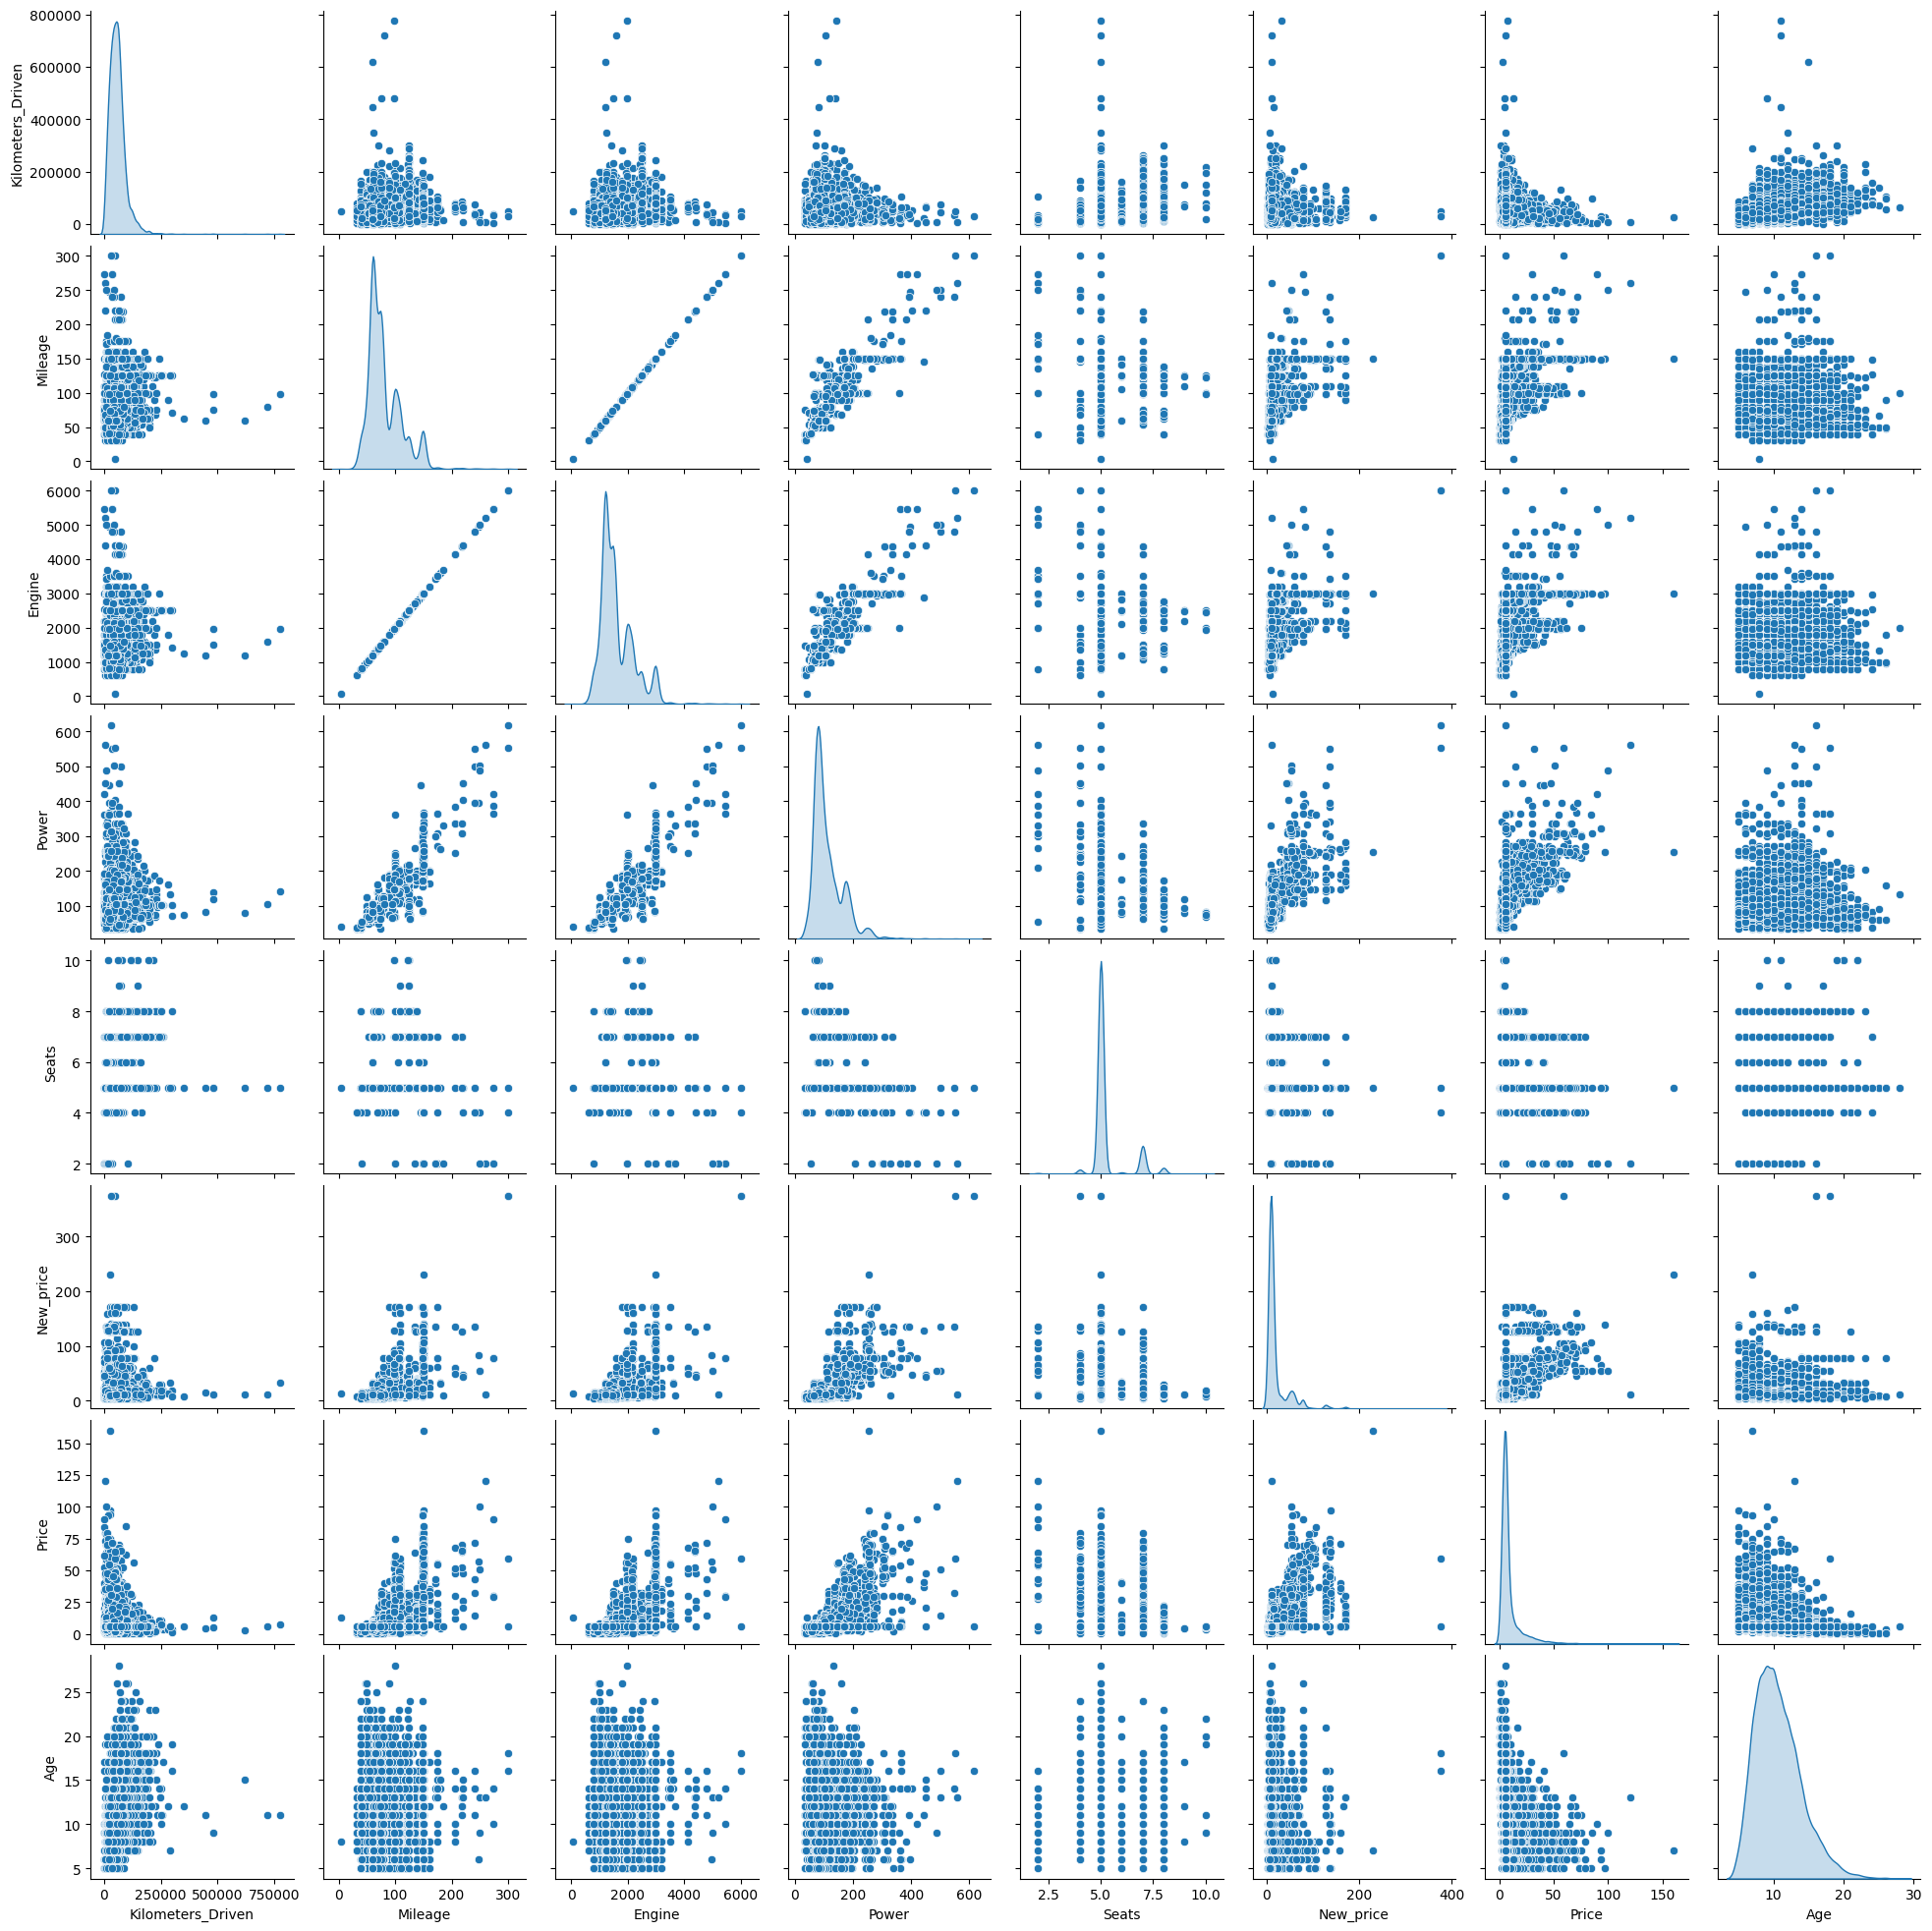

In [689]:
# Pair plot of the numeric variables to understand the correlation and importance
sns.pairplot(data=data, corner = False, diag_kind='kde');

In [690]:
def bivariate_analysis(df, x, cat_list):
    fig, axes=plt.subplots(int(len(cat_list)/2 if len(cat_list) % 2 == 0 else (len(cat_list)+1)/2), 2, \
                           figsize=(15,11))
    i = 0
    for h in cat_list:
        #sns.countplot(data=df, x=x, hue=h)
        sns.boxplot(data=df, x=h, y=x, showmeans=True, ax=axes[i//2, i%2]).set(title=x + ' By ' + h)
        i+=1

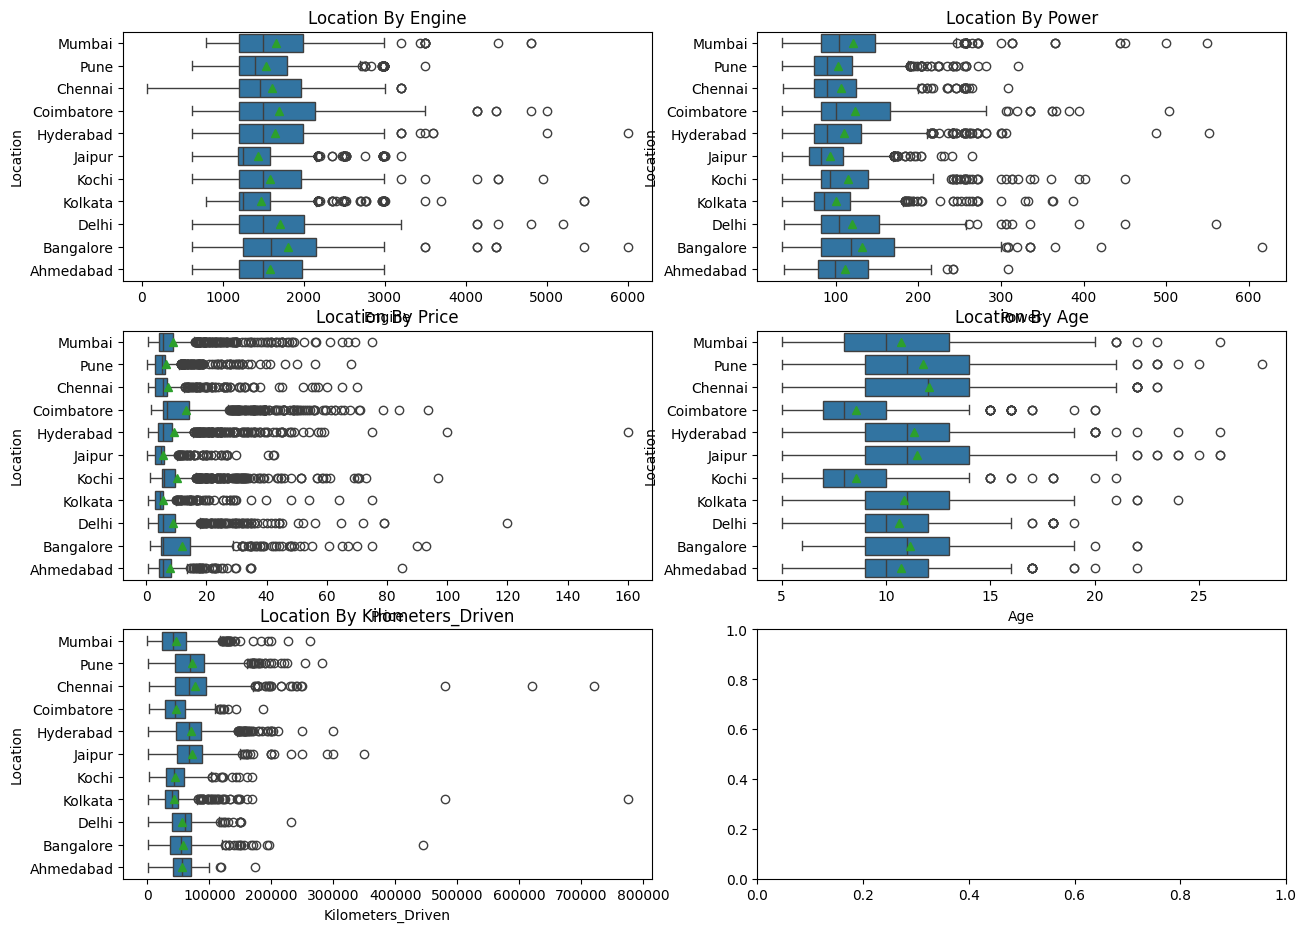

In [691]:
# Plot quantitative value distribution box using box chart by Location
bivariate_analysis(data, x='Location', \
                   cat_list=['Engine', 'Power', 'Price', 'Age', 'Kilometers_Driven'])

In [692]:
# Calculate median price by location and sort
median_prices = data_imputed.groupby('Location')['Price'].median().sort_values(ascending=False)

# Print the result
print(median_prices)


Location
Coimbatore    7.055
Kochi         6.060
Ahmedabad     5.640
Bangalore     5.640
Delhi         5.640
Hyderabad     5.640
Mumbai        5.640
Chennai       5.500
Pune          5.250
Jaipur        5.000
Kolkata       4.500
Name: Price, dtype: float64


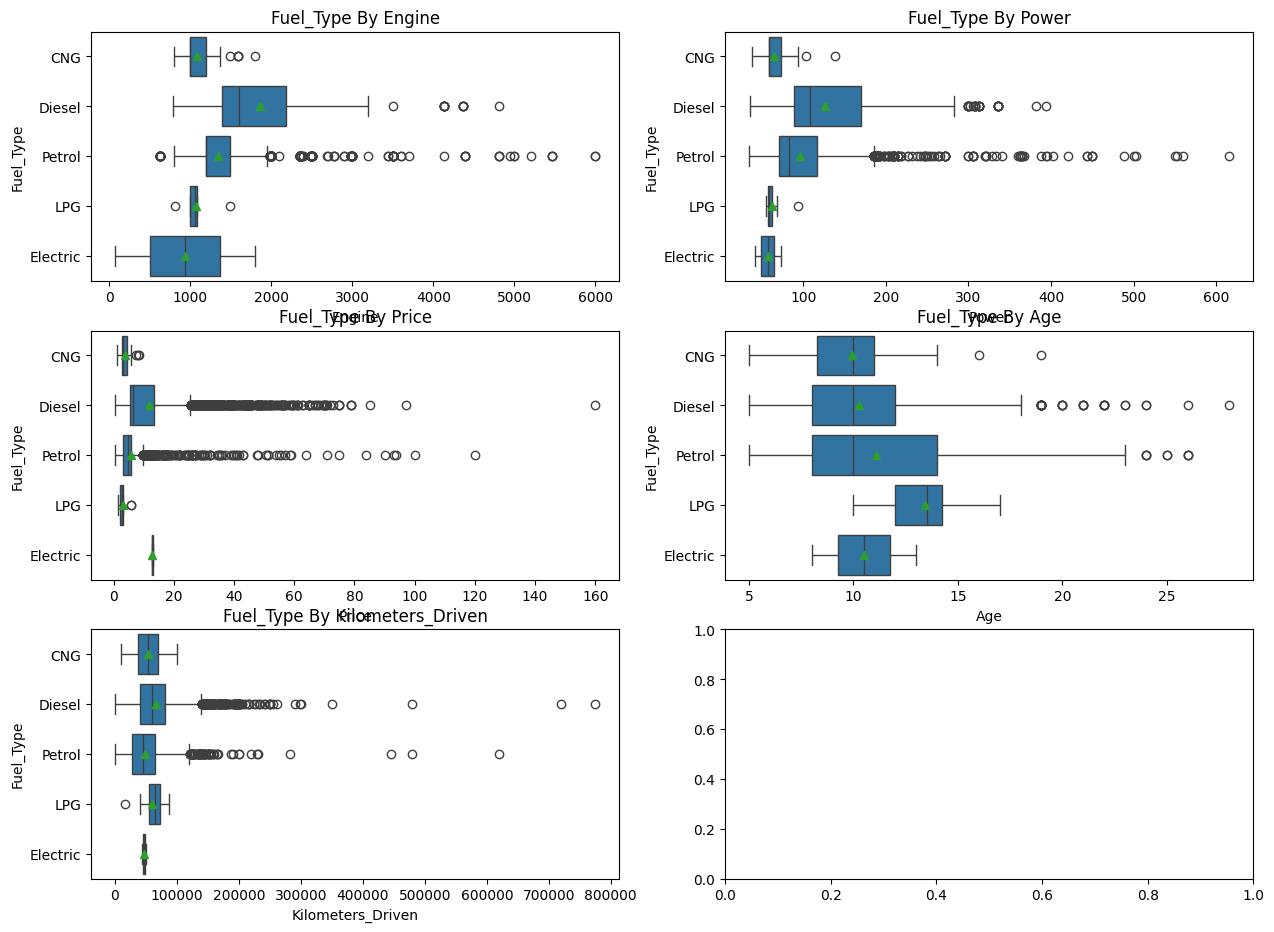

In [693]:
# Plot quantitative value distribution box using box chart by Location
bivariate_analysis(data, x='Fuel_Type', \
                   cat_list=['Engine', 'Power', 'Price', 'Age', 'Kilometers_Driven'])

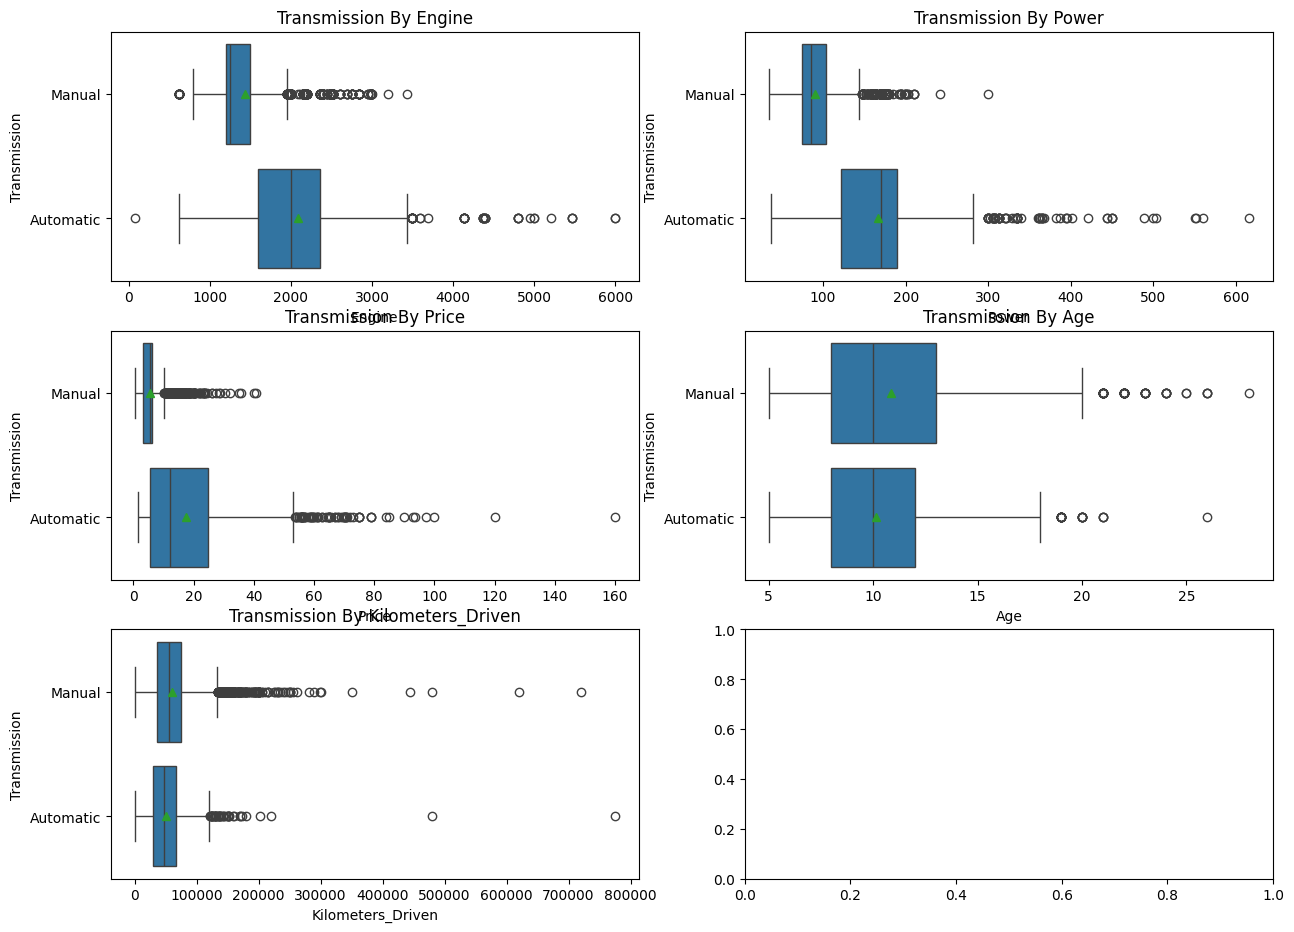

In [694]:
# Plot quantitative value distribution box using box chart by Location
bivariate_analysis(data, x='Transmission', \
                   cat_list=['Engine', 'Power', 'Price', 'Age', 'Kilometers_Driven'])

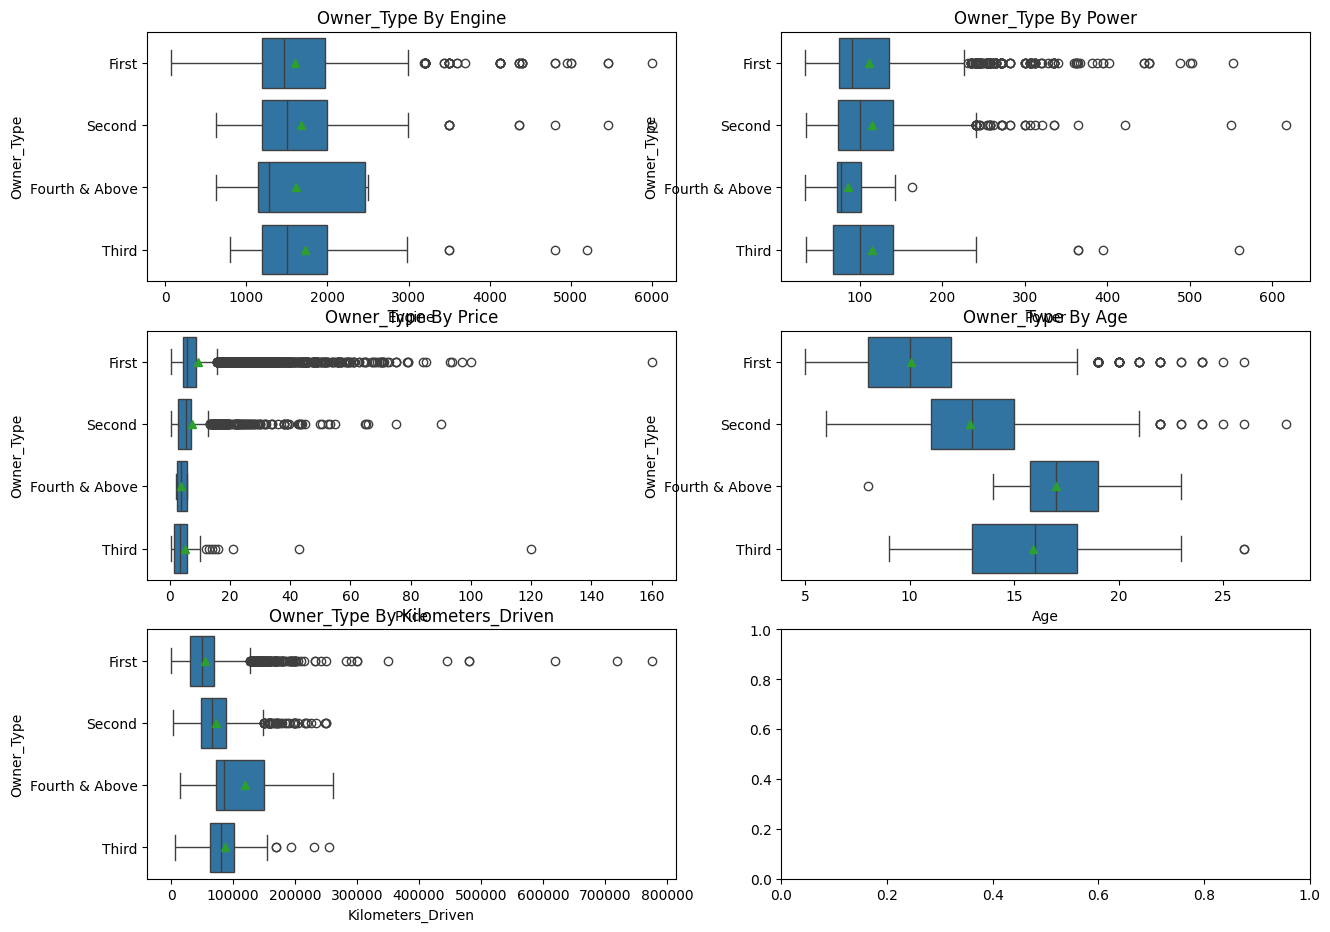

In [695]:
# Plot quantitative value distribution box using box chart by Location
bivariate_analysis(data, x='Owner_Type', \
                   cat_list=['Engine', 'Power', 'Price', 'Age', 'Kilometers_Driven'])

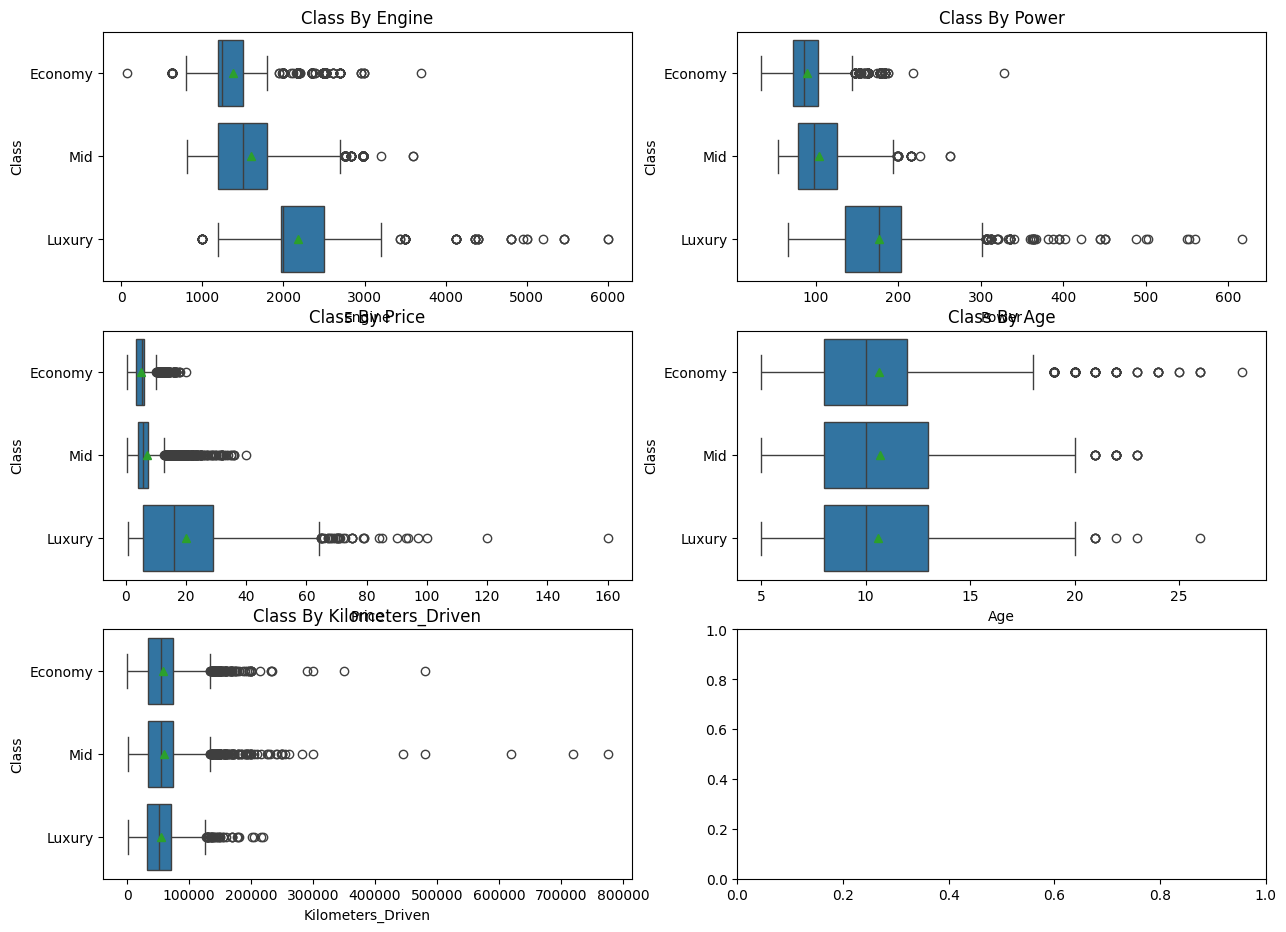

In [696]:
# Plot quantitative value distribution box using box chart by Location
bivariate_analysis(data, x='Class', \
                   cat_list=['Engine', 'Power', 'Price', 'Age', 'Kilometers_Driven'])

**Observations**

**Location**
* Bangalore, Coimbatore, Kochi:
Tend to sell higher end cars with bigger engines.
Tend to sell higher mileage cars
* Coimbatore, Kochi:
Tend to sell newer cars.
* Pune, Chennai:
Tend to sell nore highly driven cars.

**Fuel Type**
* Diesel cars generally have bigger engines with more power and and are higher priced, although there are some Petrol cars as well.

**Transmission**
* Automatics tend to be bigger, more powerful, more expensive and newer.

**Owner_Type**
* One owner cars tend to be newer and more expensive (obviously).

**Class**
* Luxury cars tend to get better mileage.
* Luxury cars tend to have bigger, more powerful engines and are more expensive.



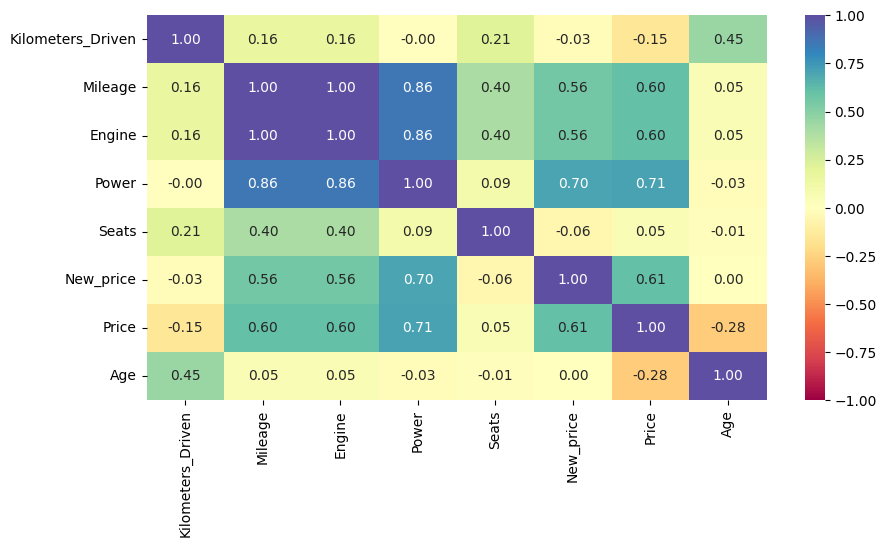

In [697]:
cols_list = data.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (10, 5))
sns.heatmap(
    data[cols_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)
plt.show()

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

**Location**
* Bangalore, Coimbatore, Hyderabad:
  * Tend to sell higher end cars with bigger engines.
  * Tend to sell higher mileage cars.
* Coimbatore, Kochi:
  * Tend to sell newer cars.
* Pune, Chennai:
  * Tend to sell more highly driven cars.

**Fuel Type**
* Diesel cars generally have bigger engines with more power and and are higher priced, although there are some Petrol cars as well.

**Transmission**
* Automatics tend to be bigger, more powerful, more expensive and newer.

**Owner_Type**
* One owner cars tend to be newer and more expensive (obviously).

**Class**
* Luxury cars tend to get better mileage.
* Luxury cars tend to have bigger, more powerful engines and are more expensive.

**Additional Observations**
* New_price and Price are highly correlated - even as the car ages.
* Price decreases as number of owner increases.
* Engine, Power, Age, Mileage, Fuel Type, Class, Transmission, New Price correlates with the Price
* Kilometers_Driven does not seem to drive down price as much as Age does.

**Data Preprocessing**
* There are many missing values in the original data set.  The concern here is how much error are we introducing in during the treatment process itself.  We created three separate data sets to use for modeling.  We will do our best to find the best one for modeling.

##**Encoding and Dummy Variables**

Encode categorical variables, drop unnecessary columns and create dummy variables for the categrical columns in all our data sets.

In [698]:
# Encode Class to a numerical to help reduce multicollinearity issues later.
data_dropped['Class'] = data_dropped['Class'].replace({"Economy":1,"Mid":2,"Luxury":3})
data_imputed['Class'] = data_imputed['Class'].replace({"Economy":1,"Mid":2,"Luxury":3})
data_imputed_dropped['Class'] = data_imputed_dropped['Class'].replace({"Economy":1,"Mid":2,"Luxury":3})

In [699]:
##data = data.drop(['Name','Model'], axis=1)
data_dropped = data_dropped.drop(['Name','Make','Model'], axis=1)
data_imputed = data_imputed.drop(['Name','Make','Model'], axis=1)
data_imputed_dropped = data_imputed_dropped.drop(['Name','Make','Model'], axis=1)

In [700]:
# Encode Class to a numerical to help reduce multicollinearity issues later.
data_dropped['Owner_Type'] = data_dropped['Owner_Type'].replace({"First":4,"Second":3,"Third":2,"Fourth & Above":1})
data_imputed['Owner_Type'] = data_imputed['Owner_Type'].replace({"First":4,"Second":3,"Third":2,"Fourth & Above":1})
data_imputed_dropped['Owner_Type'] = data_imputed_dropped['Owner_Type'].replace({"First":4,"Second":3,"Third":2,"Fourth & Above":1})

In [701]:
# Create dummy variables for the rest of our categorical variables
data_dropped = pd.get_dummies(
    data_dropped,
    columns = data_dropped.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = False,
)
data_imputed = pd.get_dummies(
    data_imputed,
    columns = data_imputed.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = False,
)
data_imputed_dropped = pd.get_dummies(
    data_imputed_dropped,
    columns = data_imputed_dropped.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = False,
)


In [702]:
# Check the data types for all the columns as well as for missing data
data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5843 entries, 0 to 6018
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Kilometers_Driven       5843 non-null   int64  
 1   Owner_Type              5843 non-null   int64  
 2   Mileage                 5843 non-null   float64
 3   Engine                  5843 non-null   float64
 4   Power                   5843 non-null   float64
 5   Seats                   5843 non-null   float64
 6   Price                   5843 non-null   float64
 7   Age                     5843 non-null   int64  
 8   Class                   5843 non-null   int64  
 9   Location_Ahmedabad      5843 non-null   bool   
 10  Location_Bangalore      5843 non-null   bool   
 11  Location_Chennai        5843 non-null   bool   
 12  Location_Coimbatore     5843 non-null   bool   
 13  Location_Delhi          5843 non-null   bool   
 14  Location_Hyderabad      5843 non-null   bool 

In [703]:
# Check the data types for all the columns as well as for missing data
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Kilometers_Driven       7252 non-null   int64  
 1   Owner_Type              7252 non-null   int64  
 2   Mileage                 7252 non-null   float64
 3   Engine                  7252 non-null   float64
 4   Power                   7252 non-null   float64
 5   Seats                   7252 non-null   float64
 6   New_price               7252 non-null   float64
 7   Price                   7252 non-null   float64
 8   Age                     7252 non-null   int64  
 9   Class                   7252 non-null   int64  
 10  Location_Ahmedabad      7252 non-null   bool   
 11  Location_Bangalore      7252 non-null   bool   
 12  Location_Chennai        7252 non-null   bool   
 13  Location_Coimbatore     7252 non-null   bool   
 14  Location_Delhi          7252 non-null   bool 

In [704]:
# Check the data types for all the columns as well as for missing data
data_imputed_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5891 entries, 0 to 6017
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Kilometers_Driven       5891 non-null   int64  
 1   Owner_Type              5891 non-null   int64  
 2   Mileage                 5891 non-null   float64
 3   Engine                  5891 non-null   float64
 4   Power                   5891 non-null   float64
 5   Seats                   5891 non-null   float64
 6   New_price               5891 non-null   float64
 7   Price                   5891 non-null   float64
 8   Age                     5891 non-null   int64  
 9   Class                   5891 non-null   int64  
 10  Location_Ahmedabad      5891 non-null   bool   
 11  Location_Bangalore      5891 non-null   bool   
 12  Location_Chennai        5891 non-null   bool   
 13  Location_Coimbatore     5891 non-null   bool   
 14  Location_Delhi          5891 non-null   bool 

## **Building Various Models**


1. What we want to predict is the "Price". We will normalize 'Price' for modeling.
2. Remember, we encoded our categorical variables above right after we did our feature engineering.
3. We'll split the data into 80% train and 20% test, to be able to evaluate the model that we build on the train data.
4. We will be building various regression models using the training data evaluate each model's performance.

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
Recall that above, we engineered three data sets to use for:
*   First, we simply dropped the New_price column and then all rows with Null data.
*   Second, we painstakingly imputed all Null/zero values with the median based on Make, Model, etc.
*   Third is a hybrid approach where we imputed most of the rows but dropped a few hundred rows at the end where we just didn't have any price data whatsoever.

We will use the best performing linear regression model to choose which data set to use for additional models.

**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

###**Linear Regression**

####**Tools**
First, let's gather some tools we can use to evaluate our models.

In [709]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / (targets)) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [710]:
def check_homoscedasticity(model, predictors, target):
    y_pred = model.predict(predictors)
    residuals = target - y_pred

    # Create a DataFrame from the predicted values and residuals
    df = pd.DataFrame({'Predicted Values': y_pred, 'Residuals': residuals})

    p = plt.figure(figsize=(15,7))
    # Pass the DataFrame to scatterplot
    p = sns.scatterplot(data=df, x='Predicted Values', y='Residuals')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    p = sns.lineplot(x=[-2,10], y=[0,0], color='blue')
    p = plt.title('Residuals vs fitted values plot for homoscedasticity check')
    plt.show() # Add this line to display the plot

### **Splitting the Data**

Before modeling each of our data sets, we must do the following:
<li>Normalize the Price and Kilometers_driven, New_price because the are skewed.
<li>Seperating the indepdent variables (X) and the dependent variable (y).
<li>Split the data into train and test using train_test_split.

**Note:** We encoded the categorical variables in X in previous sections above.

**Question:**

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

**Answer:**

Below we are log transforming Price and Kilometers_driven in place.  Names was dropped above as we used it to engineer the Make columna and is no longer needes.

###**Model1 - Dropped, No Imputed Missing Data**

In [711]:
# Log transformation is too aggressive for normalizing our Price distribution as
# it produces predictions that fall below zero due to small values on the low
# end.  Add a small constant to mitigate this for modeling purposes.
data_dropped['Price'] = np.log(data_dropped['Price'] + 1)

# Normalize Kilometers_Driven as it is also skewed.
data_dropped['Kilometers_Driven'] = np.log(data_dropped['Kilometers_Driven'])

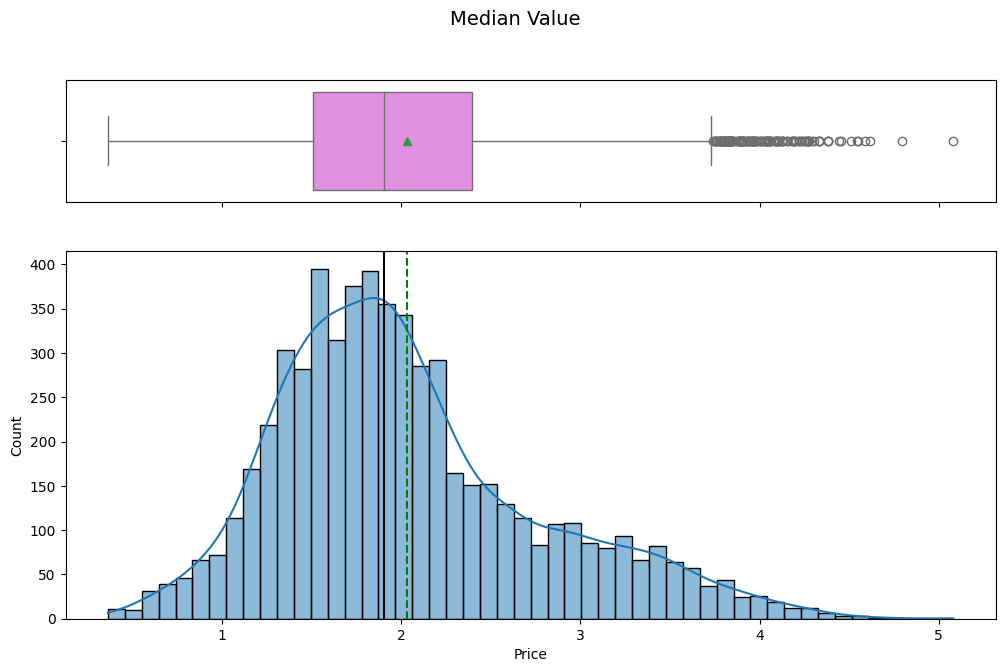

In [712]:
histogram_boxplot(data_dropped, 'Price', 'Median Value', kde = True, bins = 50)
plt.show()

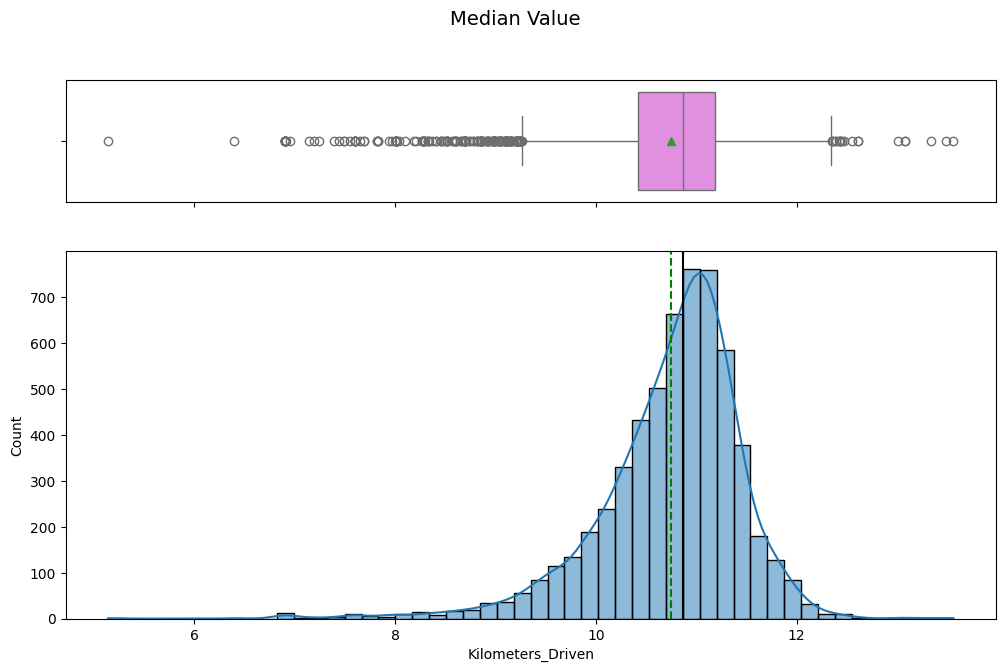

In [713]:
histogram_boxplot(data_dropped, 'Kilometers_Driven', 'Median Value', kde = True, bins = 50)
plt.show()

**Splitting the Data**

In [714]:
# Separating independent variables and the target variable
x = data_dropped.drop('Price',axis=1)
y = data_dropped['Price']

In [715]:
# Splitting the dataset into train and test datasets
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 1)

In [716]:
# Checking the shape of the train and test data
print("Shape of Training set : ", x_train1.shape)
print("Shape of test set : ", x_test1.shape)

Shape of Training set :  (4674, 25)
Shape of test set :  (1169, 25)


In [717]:
x_train1 = x_train1.astype(float)
y_train1 = y_train1.astype(float)

import statsmodels.api as sm

# Statsmodel API does not add a constant by default. We need to add it explicitly.
x_train1 = sm.add_constant(x_train1)

# Add constant to test data
x_test1 = sm.add_constant(x_test1)

# Train the model
olsmodel1 = sm.OLS(y_train1, x_train1).fit()

# Get the model summary
olsmodel1.summary()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     1716.
Date:                Wed, 14 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:17:10   Log-Likelihood:                -48.737
No. Observations:                4674   AIC:                             143.5
Df Residuals:                    4651   BIC:                             291.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

**Plotting the Residuals**

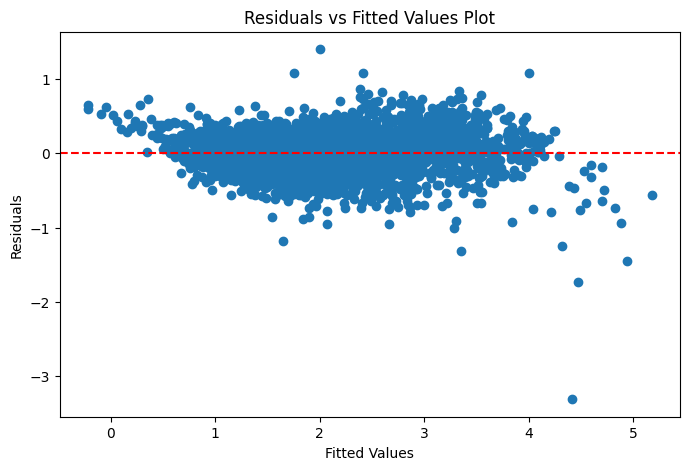

In [718]:
# Assuming you have your fitted OLS model in 'olsmodel1'
# And your training data predictors in 'x_train1' and response in 'y_train1'

# 1. Get fitted values and residuals
y_pred1 = olsmodel1.predict(x_train1)
residuals = y_train1 - y_pred1

# 2. Create the residual plot
plt.figure(figsize=(8, 5))  # Adjust figure size if needed
plt.scatter(y_pred1, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values Plot")
plt.show()

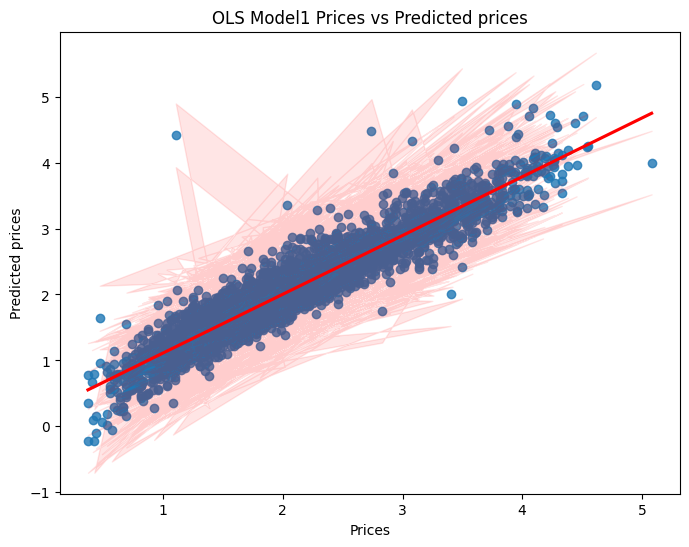

In [719]:
# Model prediction on train data
y_pred1 = olsmodel1.predict(x_train1)

# Calculate confidence intervals (replace alpha with your desired significance level)
alpha = 0.05
predictions = olsmodel1.get_prediction(x_train1)
pred_summary = predictions.summary_frame(alpha=alpha)
y_pred_ci_lower = pred_summary['obs_ci_lower']
y_pred_ci_upper = pred_summary['obs_ci_upper']

# Visualize
plt.figure(figsize=(8, 6))
sns.regplot(x=y_train1, y=y_pred1, ci=None, line_kws={'color':'red'})  # Trend line with seaborn

# Add confidence intervals
plt.fill_between(y_train1, y_pred_ci_lower, y_pred_ci_upper, color='red', alpha=0.1)  # Confidence band

plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("OLS Model1 Prices vs Predicted prices")
plt.show()

**Training vs Testing Performance**

In [720]:
lin_reg_train1 = model_performance_regression(olsmodel1, x_train1, y_train1)
lin_reg_train1

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.244507  0.183953    0.89033        0.889716  10.292472

In [721]:
lin_reg_test1 = model_performance_regression(olsmodel1, x_test1, y_test1)
lin_reg_test1

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.229709  0.181208   0.903992        0.901806  10.21477

**Checking VIF for Multicollinearity**

In [722]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

print(checking_vif(x_train1))

                   feature       VIF
0                    const  0.000000
1        Kilometers_Driven  1.686788
2               Owner_Type  1.258882
3                  Mileage  3.442855
4                   Engine  9.217250
5                    Power  7.251390
6                    Seats  2.107358
7                      Age  2.049086
8                    Class  1.758955
9       Location_Ahmedabad       inf
10      Location_Bangalore       inf
11        Location_Chennai       inf
12     Location_Coimbatore       inf
13          Location_Delhi       inf
14      Location_Hyderabad       inf
15         Location_Jaipur       inf
16          Location_Kochi       inf
17        Location_Kolkata       inf
18         Location_Mumbai       inf
19           Location_Pune       inf
20           Fuel_Type_CNG       inf
21        Fuel_Type_Diesel       inf
22           Fuel_Type_LPG       inf
23        Fuel_Type_Petrol       inf
24  Transmission_Automatic       inf
25     Transmission_Manual       inf


####Observations
* **High R-squared (0.891) and Adjusted R-squared (0.891):** These indicate that the model explains a substantial portion (around 89%) of the variance in car prices. It's a very good fit, suggesting your predictors effectively capture the factors influencing price.
* **Strong F-statistic and Low P-value:** The high F-statistic and near-zero p-value confirm the overall statistical significance of the model.
*  **Many Significant Predictors:** Most of the variables, including Kilometers_Driven, Mileage, Power, Seats, Age, various Location and Fuel_Type categories, and some Owner_Type and Class variables, have low p-values, indicating their significant impact on price.
*  **Key Price Drivers:** The model suggests that factors like Age (negative coefficient, indicating depreciation), Kilometers_Driven (negative), Mileage (positive), Power (positive), and Seats (positive) are key drivers of used car prices.
*  **Location:** Specific locations like Bangalore, Hyderabad, and Coimbatore are associated with higher prices, while Kolkata might have lower prices.
Fuel Type: Diesel and Electric cars tend to have higher prices compared to Petrol (the baseline). CNG also shows a positive impact, but its p-value is slightly higher, warranting further investigation.
*  **Multicollinearity Warning:** The "smallest eigenvalue" message indicates potential multicollinearity.
*  R-squared, Root Mean Square Error are slightly higher on the training data vs. test data.  We are slightly overfitting.

We dropped a lot of data to build this model.  Let's build modeels using the data with imputed values before working with this model further.

###**Model2 - Imputed all Missing Data with the Median**

In [723]:
# Log transformation is too aggressive for normalizing our Price distribution as
# it produces predictions that fall below zero due to small values on the low
# end.  Add a small constant to mitigate this for modeling purposes.
data_imputed['Price'] = np.log(data_imputed['Price'] + 1)

# Normalize Kilometers_Driven, New_price as they are also skewed.
data_imputed['Kilometers_Driven'] = np.log(data_imputed['Kilometers_Driven'])
data_imputed['New_price'] = np.log(data_imputed['New_price'])

# Separating independent variables and the target variable
x = data_imputed.drop('Price',axis=1)
y = data_imputed['Price']

# Splitting the dataset into train and test datasets
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 1)

# Checking the shape of the train and test data
print("Shape of Imputed Training set : ", x_train2.shape)
print("Shape of Imputed Test set : ", x_test2.shape)


Shape of Imputed Training set :  (5801, 27)
Shape of Imputed Test set :  (1451, 27)


In [724]:
x_train2 = x_train2.astype(float)
y_train2 = y_train2.astype(float)

import statsmodels.api as sm

# Statsmodel API does not add a constant by default. We need to add it explicitly.
x_train2 = sm.add_constant(x_train2)

# Add constant to test data
x_test2 = sm.add_constant(x_test2)

# Train the model
olsmodel2 = sm.OLS(y_train2, x_train2).fit()

# Get the model summary
olsmodel2.summary()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     784.6
Date:                Wed, 14 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:17:12   Log-Likelihood:                -1988.5
No. Observations:                5801   AIC:                             4023.
Df Residuals:                    5778   BIC:                             4176.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

**Training vs Testing Performance**

In [725]:
lin_reg_train2 = model_performance_regression(olsmodel2, x_train2, y_train2)
lin_reg_train2

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.340906  0.240832   0.749208        0.747992  13.166986

In [726]:
lin_reg_test2 = model_performance_regression(olsmodel2, x_test2, y_test2)
lin_reg_test2

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.316469  0.232214   0.789869        0.785731  12.462047

####**Observation**
This model where we painstakingly imputed all missing data is not performing as well as the model where we simply dropped all rows with missing data.  Let's check the hybrid data set where we imputed most but not all of the missing data and see what we get.

###**Model3 - Imputed, Dropped Missing Data**

In [727]:
# Log transformation is too aggressive for normalizing our Price distribution as
# it produces predictions that fall below zero due to small values on the low
# end.  Add a small constant to mitigate this for modeling purposes.
data_imputed_dropped['Price'] = np.log(data_imputed_dropped['Price'] + 1)

# Normalize Kilometers_Driven, New_price as they are also skewed.
data_imputed_dropped['Kilometers_Driven'] = np.log(data_imputed_dropped['Kilometers_Driven'])
data_imputed_dropped['New_price'] = np.log(data_imputed_dropped['New_price'])

# Separating independent variables and the target variable
x = data_imputed_dropped.drop('Price',axis=1)
y = data_imputed_dropped['Price']

# Splitting the dataset into train and test datasets
x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 1)

# Checking the shape of the train and test data
print("Shape of Imputed Training set : ", x_train3.shape)
print("Shape of Imputed Test set : ", x_test3.shape)


Shape of Imputed Training set :  (4712, 27)
Shape of Imputed Test set :  (1179, 27)


In [728]:
x_train3 = x_train3.astype(float)
y_train3 = y_train3.astype(float)
# Reset the index of both x_train3 and y_train3
x_train3 = x_train3.reset_index(drop=True)
y_train3 = y_train3.reset_index(drop=True)

import statsmodels.api as sm

# Statsmodel API does not add a constant by default. We need to add it explicitly.
x_train3 = sm.add_constant(x_train3)

# Add constant to test data
x_test3 = sm.add_constant(x_test3)

# Train the model
olsmodel3 = sm.OLS(y_train3, x_train3).fit()

# Get the model summary
olsmodel3.summary()
print(olsmodel3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1939.
Date:                Wed, 14 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:17:12   Log-Likelihood:                 228.89
No. Observations:                4712   AIC:                            -409.8
Df Residuals:                    4688   BIC:                            -254.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [729]:
lin_reg_train3 = model_performance_regression(olsmodel3, x_train3, y_train3)
lin_reg_train3

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.230497  0.172928   0.904864        0.904296  9.935849

In [730]:
#x_test3 = sm.add_constant(x_test3)
lin_reg_test3 = model_performance_regression(olsmodel3, x_test3, y_test3)
lin_reg_test3

RMSE       MAE  R-squared  Adj. R-squared     MAPE
0  0.222102  0.168271   0.909393        0.907186  9.54473

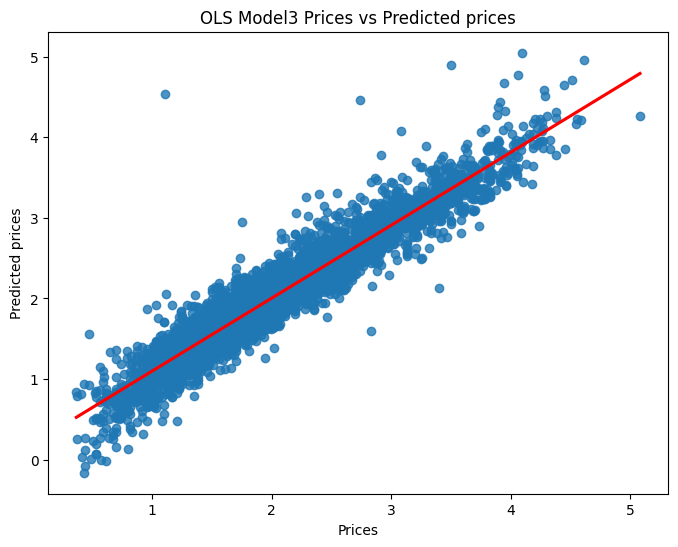

In [731]:
# Model prediction on train data
y_pred3 = olsmodel3.predict(x_train3)

# Visualize
plt.figure(figsize=(8, 6))
sns.regplot(x=y_train3, y=y_pred3, ci=None, line_kws={'color':'red'})  # Trend line with seaborn

# Add confidence intervals
#plt.fill_between(y_train1, y_pred_ci_lower, y_pred_ci_upper, color='red', alpha=0.1)  # Confidence band

plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("OLS Model3 Prices vs Predicted prices")
plt.show()

In [732]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

print(checking_vif(x_train3))

                   feature       VIF
0                    const  0.000000
1        Kilometers_Driven  1.709749
2               Owner_Type  1.250104
3                  Mileage       inf
4                   Engine       inf
5                    Power  7.505434
6                    Seats  1.807718
7                New_price  4.110288
8                      Age  1.946084
9                    Class  2.320215
10      Location_Ahmedabad       inf
11      Location_Bangalore       inf
12        Location_Chennai       inf
13     Location_Coimbatore       inf
14          Location_Delhi       inf
15      Location_Hyderabad       inf
16         Location_Jaipur       inf
17          Location_Kochi       inf
18        Location_Kolkata       inf
19         Location_Mumbai       inf
20           Location_Pune       inf
21           Fuel_Type_CNG       inf
22        Fuel_Type_Diesel       inf
23      Fuel_Type_Electric       inf
24           Fuel_Type_LPG       inf
25        Fuel_Type_Petrol       inf
2

####**Observations**
* Mileage, Power and Engine are showing high correlation.  We will drop Engine and Mileage.

###**Model4 - Dropping Columns to Reduce Multicollinearity**

In [733]:
# Dropping correlated columns and generating a new model
data_imputed_dropped = data_imputed_dropped.drop('Engine',axis=1)
data_imputed_dropped = data_imputed_dropped.drop('Mileage',axis=1)
#data_imputed_dropped = data_imputed_dropped.drop('Power',axis=1)
#data_imputed_dropped = data_imputed_dropped.drop('Kilometers_Driven',axis=1)
data_imputed_dropped = data_imputed_dropped.drop('Fuel_Type_Diesel',axis=1)

# Separating independent variables and the target variable
x = data_imputed_dropped.drop('Price',axis=1)
y = data_imputed_dropped['Price']

# Scaling the data
#sc = StandardScaler()
#sc = MinMaxScaler()

#X_scaled = sc.fit_transform(x)
#X_scaled = pd.DataFrame(X_scaled, columns = x.columns)

# Splitting the dataset into train and test datasets
x_train4, x_test4, y_train4, y_test4 = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 1)

# Checking the shape of the train and test data
print("Shape of Imputed Training set : ", x_train4.shape)
print("Shape of Imputed Test set : ", x_test4.shape)

Shape of Imputed Training set :  (4712, 24)
Shape of Imputed Test set :  (1179, 24)


In [734]:
x_train4 = x_train4.astype(float)
y_train4 = y_train4.astype(float)

import statsmodels.api as sm

# Statsmodel API does not add a constant by default. We need to add it explicitly.
x_train4 = sm.add_constant(x_train4)

# Add constant to test data
x_test4 = sm.add_constant(x_test4)

# Train the model
olsmodel4 = sm.OLS(y_train4, x_train4).fit()

# Get the model summary
olsmodel4.summary()
print(olsmodel4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     2000.
Date:                Wed, 14 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:17:13   Log-Likelihood:                 199.95
No. Observations:                4712   AIC:                            -353.9
Df Residuals:                    4689   BIC:                            -205.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [735]:
lin_reg_train4 = model_performance_regression(olsmodel4, x_train4, y_train4)
lin_reg_train4

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.231917  0.174112   0.903689        0.903175  9.953127

In [736]:
lin_reg_test4 = model_performance_regression(olsmodel4, x_test4, y_test4)
lin_reg_test4

RMSE       MAE  R-squared  Adj. R-squared     MAPE
0  0.223369  0.168272   0.908356        0.906369  9.47547

In [737]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

print(checking_vif(x_train4))

                   feature       VIF
0                    const  0.000000
1        Kilometers_Driven  1.708891
2               Owner_Type  1.250022
3                    Power  2.798612
4                    Seats  1.205568
5                New_price  4.107497
6                      Age  1.896205
7                    Class  2.313106
8       Location_Ahmedabad       inf
9       Location_Bangalore       inf
10        Location_Chennai       inf
11     Location_Coimbatore       inf
12          Location_Delhi       inf
13      Location_Hyderabad       inf
14         Location_Jaipur       inf
15          Location_Kochi       inf
16        Location_Kolkata       inf
17         Location_Mumbai       inf
18           Location_Pune       inf
19           Fuel_Type_CNG  1.042709
20      Fuel_Type_Electric  1.007469
21           Fuel_Type_LPG  1.007097
22        Fuel_Type_Petrol  1.524902
23  Transmission_Automatic       inf
24     Transmission_Manual       inf


####**Observations**

Overall Model Fit

* **R-squared (0.903) and Adjusted R-squared (0.903):** This is a very strong fit, indicating that the model explains approximately 90% of the variance in car prices. It's slightly better than the previous model, which is a positive sign.

* **High F-statistic and Low P-value:** The high F-statistic and near-zero p-value confirm that the model is highly statistically significant overall.

* **Key Price Drivers:** The model highlights the following as major influences on price:

  * Age (negative coefficient, indicating depreciation)
  * Kilometers_Driven (negative)
  * Power (positive)
  * Seats (positive)
  * New_price (positive)
  * Specific Location categories (Bangalore, Coimbatore, Hyderabad, etc.)
  * Fuel_Type_Electric (positive)
  * Transmission_Manual (negative)
  * Owner_Type categories (First, Fourth & Above, Second, and Third)
  * Class categories (Economy, Luxury, and Mid)

Interpretation

  The coefficients generally align with expectations. For instance:

  * Newer cars, those with lower mileage, higher power, more seats, and higher original prices tend to command higher prices.
  * Electric cars have a premium, and manual transmission is associated with lower prices.
  * The impact of location, owner type, and car class varies depending on the specific category.

In [738]:
# Generate a table that summarizes RMSE, MAE R-squared, Adjusted R-squared and
# MAPE for lin_reg_test1, lin_reg_test2. lin_reg_test3, lin_reg_test4

# Create a list of your DataFrames
dfs = [lin_reg_test1, lin_reg_test2, lin_reg_test3, lin_reg_test4]

# Add a column to identify the model for each DataFrame
for i, df in enumerate(dfs):
    df['Model'] = f'Model {i+1}'

# Concatenate all DataFrames into one
all_metrics = pd.concat(dfs, ignore_index=True)

# Set 'Model' as the index
all_metrics = all_metrics.set_index('Model')

# Display the summarized table
print(all_metrics)

             RMSE       MAE  R-squared  Adj. R-squared       MAPE
Model                                                            
Model 1  0.229709  0.181208   0.903992        0.901806  10.214770
Model 2  0.316469  0.232214   0.789869        0.785731  12.462047
Model 3  0.222102  0.168271   0.909393        0.907186   9.544730
Model 4  0.223369  0.168272   0.908356        0.906369   9.475470


###Observations
OLS Models 1, 3, and 4 are performing very similarly.  Let's pick Model 4 as it has the smallest MAPE.

### **Checking the below linear regression assumptions**

In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**


In [739]:
# Mean of residuals should be near zero
residuals = olsmodel4.resid
np.mean(residuals)

-7.908218505627919e-16

In [740]:
# Check for homoscedacity
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train4, x_train4)
lzip(name, test)

[('F statistic', 1.1627512004699183), ('p-value', 0.00013657036626003004)]

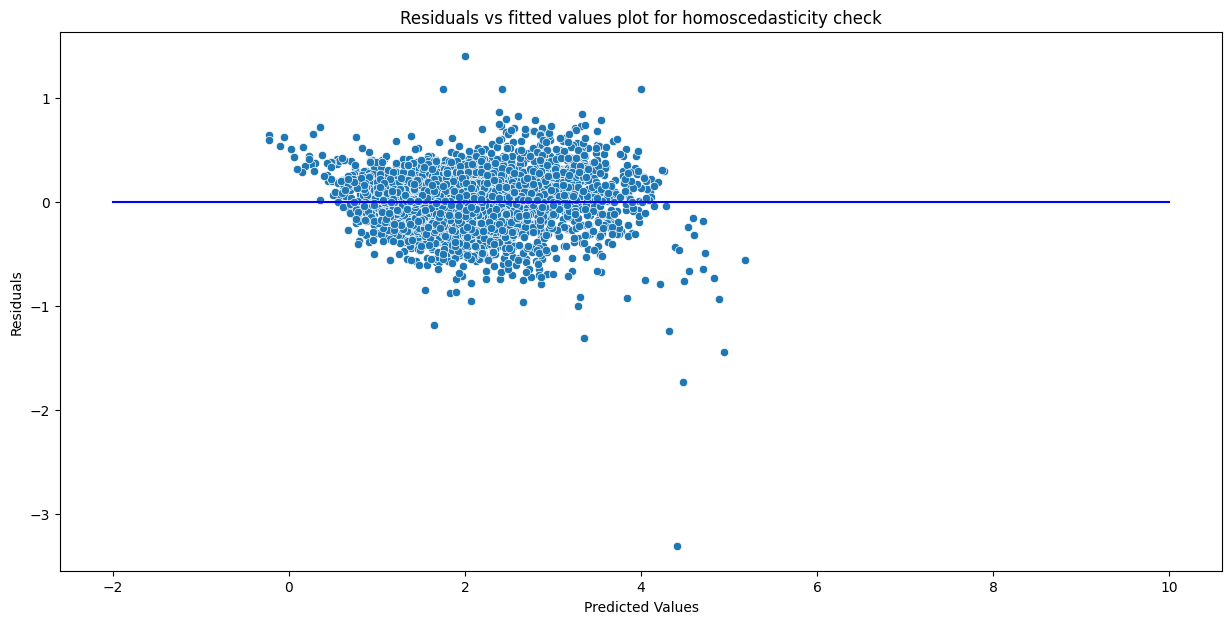

In [741]:
check_homoscedasticity(olsmodel1, x_train1, y_train1)

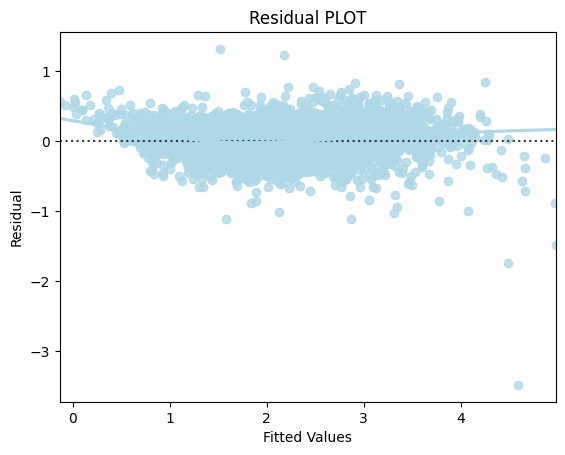

In [742]:
# Predicted values
fitted = olsmodel4.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

<Axes: ylabel='Count'>

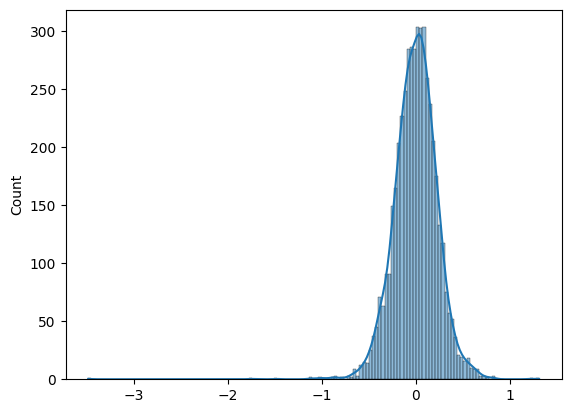

In [743]:
# Plot histogram of residuals
sns.histplot(residuals, kde = True)

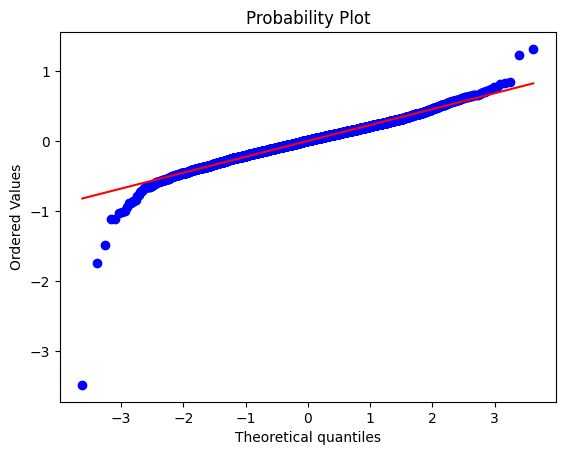

In [744]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

###**Conclusions- Linear Regression**

**Assumptions for Linear Regression**
* Mean of residuals should is near zero
* Our data exhibits **heteroscedasticity**. The variance of the errors (residuals) is not constant across different levels of your predictors.
* We do see a normal distribution of error terms.
* Q-Q plot show a S-shaped curve suggesting our residuals have heavier tails than a normal distribution.

Despite employing multiple techniques...
* Feature Engineering
* Dummy Variable Encoding
* Dropping Correlated Variables
* Imputing data
* Log transforming skewed variables

... we are still seeing evidence on **multicollinearity** and **heteroscedasticity**.  These models are performing well in capturing the price dynamics of the used car market. However, further efforts addressing non-normality and multicollinearity may enhance its reliability and interpretability.

It seems we could go on for weeks refining the techniques mentioned above to get resolve these issues.  **Let's explore other regression models which may be much less sensitive to these issues.**

### **Ridge, Lasso Regression**

#### Ridge Regression

In [745]:
from sklearn.linear_model import RidgeCV
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Ridge Regression with Cross-Validation (No Changes)
alphas = [0.01, 0.1, 1, 10, 100]
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(x_train4, y_train4)

print(f"Best alpha (lambda) value found by CV: {ridge_cv.alpha_:.4f}")

# 2. Fit the Ridge Model (No Changes)
ridge_model = sm.OLS(y_train4, x_train4).fit_regularized(method='elastic_net', L1_wt=0, alpha=ridge_cv.alpha_)

# 3. Evaluate on Training Data (No Changes)
y_pred_train = ridge_model.predict(x_train4)  # Rename for clarity
mse_train = mean_squared_error(y_train4, y_pred_train)
mae_train = mean_absolute_error(y_train4, y_pred_train)
r2_train = r2_score(y_train4, y_pred_train)

print("\nRidge Model Fit Statistics (Training Data):")
print(f"  MSE: {mse_train:.4f}")
print(f"  MAE: {mae_train:.4f}")
print(f"  R-squared: {r2_train:.4f}")

# 4. Evaluate on Test Data
y_pred_test = ridge_model.predict(x_test4)
mse_test = mean_squared_error(y_test4, y_pred_test)
mae_test = mean_absolute_error(y_test4, y_pred_test)
r2_test = r2_score(y_test4, y_pred_test)

print("\nRidge Model Fit Statistics (Test Data):")
print(f"  MSE: {mse_test:.4f}")
print(f"  MAE: {mae_test:.4f}")
print(f"  R-squared: {r2_test:.4f}")

# (Optional) Display coefficients
print("\nRidge Coefficients:")
coef_df = pd.DataFrame({'Feature': x_train4.columns, 'Coefficient': ridge_model.params})
print(coef_df)

Best alpha (lambda) value found by CV: 0.0100

Ridge Model Fit Statistics (Training Data):
  MSE: 0.0579
  MAE: 0.1798
  R-squared: 0.8964

Ridge Model Fit Statistics (Test Data):
  MSE: 0.0536
  MAE: 0.1732
  R-squared: 0.9016

Ridge Coefficients:
                   Feature  Coefficient
0                    const     0.275004
1        Kilometers_Driven     0.020611
2               Owner_Type     0.117571
3                    Power     0.006339
4                    Seats     0.100914
5                New_price     0.250558
6                      Age    -0.091924
7                    Class     0.038380
8       Location_Ahmedabad     0.033915
9       Location_Bangalore     0.137602
10        Location_Chennai     0.041987
11     Location_Coimbatore     0.106672
12          Location_Delhi    -0.023945
13      Location_Hyderabad     0.100659
14         Location_Jaipur     0.009621
15          Location_Kochi     0.010781
16        Location_Kolkata    -0.133313
17         Location_Mumbai    -

In [746]:
ridge_train1 = model_performance_regression(ridge_model, x_train4, y_train4)
ridge_train1

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.240558  0.179797   0.896378        0.895825  10.274134

In [747]:
ridge_test1 = model_performance_regression(ridge_model, x_test4, y_test4)
ridge_test1

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.23146  0.173189   0.901597        0.899463  9.824565

#####**Observations - Ridge Regression**

* **Model Performance:** Overall, the Ridge model shows a strong fit to the training data with a high R-squared. The relatively low MSE also indicates good predictive accuracy.
* **Impact of Regularization:** The small alpha value (0.01) suggests that only a mild amount of regularization was needed. This might be because our original model **Model 4** wasn't severely overfitting or multicollinearity wasn't a major issue.
* **Significant Predictors:** New_price (0.0311), Age (-0.1073), Power (0.0081), Transmission_Manual (-0.1974), Fuel_Type_Electric (0.8110), Location_Bangalore (0.1821) and Location_Kolkata (-0.1575) are the most significant predictors.
* The MSE, MAE and R-squared comparison between training and test data is very close and therefore the model is not over or underfitting.



#### Lasso Regression

In [748]:
# Create and fit the Lasso regression model
lasso_model = sm.OLS(y_train4, x_train4).fit_regularized(method='elastic_net', L1_wt=1)  # alpha controls regularization strength
print("*************Parameters**************")
print(lasso_model.params)

# Predictions on training data
y_pred = lasso_model.predict(x_train4)

# Calculate metrics manually
mse = mean_squared_error(y_train4, y_pred)
mae = mean_absolute_error(y_train4, y_pred)
r2 = r2_score(y_train4, y_pred)

print("\nLasso Model Fit Statistics:")
print(f"  MSE: {mse:.4f}")
print(f"  MAE: {mae:.4f}")
print(f"  R-squared: {r2:.4f}")

*************Parameters**************
const                     2.038691
Kilometers_Driven        -0.009011
Owner_Type                0.043349
Power                     0.008211
Seats                    -0.039798
New_price                 0.012564
Age                      -0.106228
Class                     0.052693
Location_Ahmedabad        0.217749
Location_Bangalore        0.363041
Location_Chennai          0.232726
Location_Coimbatore       0.282984
Location_Delhi            0.176969
Location_Hyderabad        0.310016
Location_Jaipur           0.178148
Location_Kochi            0.169762
Location_Kolkata          0.009638
Location_Mumbai           0.178872
Location_Pune             0.199431
Fuel_Type_CNG            -0.230456
Fuel_Type_Electric        0.769605
Fuel_Type_LPG            -0.202436
Fuel_Type_Petrol         -0.248047
Transmission_Automatic    0.269600
Transmission_Manual       0.049629
dtype: float64

Lasso Model Fit Statistics:
  MSE: 0.0714
  MAE: 0.1968
  R-squared: 0.

In [749]:
from sklearn.linear_model import LassoCV
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Lasso Regression with Cross-Validation (No Changes)
alphas = [0.01, 0.1, 1, 10, 100]
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(x_train4, y_train4)

print(f"Best alpha (lambda) value found by CV: {lasso_cv.alpha_:.4f}")

# 2. Fit the Lasso Model (No Changes)
lasso_model = sm.OLS(y_train4, x_train4).fit_regularized(method='elastic_net', L1_wt=1, alpha=lasso_cv.alpha_)

# 3. Evaluate on Training Data (No Changes)
y_pred_train = lasso_model.predict(x_train4)  # Rename for clarity
mse_train = mean_squared_error(y_train4, y_pred_train)
mae_train = mean_absolute_error(y_train4, y_pred_train)
r2_train = r2_score(y_train4, y_pred_train)

print("\nLasso Model Fit Statistics (Training Data):")
print(f"  MSE: {mse_train:.4f}")
print(f"  MAE: {mae_train:.4f}")
print(f"  R-squared: {r2_train:.4f}")

# 4. Evaluate on Test Data
y_pred_test = lasso_model.predict(x_test4)
mse_test = mean_squared_error(y_test4, y_pred_test)
mae_test = mean_absolute_error(y_test4, y_pred_test)
r2_test = r2_score(y_test4, y_pred_test)

print("\nLasso Model Fit Statistics (Test Data):")
print(f"  MSE: {mse_test:.4f}")
print(f"  MAE: {mae_test:.4f}")
print(f"  R-squared: {r2_test:.4f}")

# (Optional) Display coefficients
print("\nLasso Coefficients:")
print(lasso_model.params)

Best alpha (lambda) value found by CV: 0.0100

Lasso Model Fit Statistics (Training Data):
  MSE: 0.0789
  MAE: 0.2069
  R-squared: 0.8587

Lasso Model Fit Statistics (Test Data):
  MSE: 0.0701
  MAE: 0.1950
  R-squared: 0.8713

Lasso Coefficients:
const                     1.801901
Kilometers_Driven         0.033307
Owner_Type                0.025432
Power                     0.009064
Seats                    -0.020925
New_price                 0.000000
Age                      -0.110008
Class                     0.055021
Location_Ahmedabad        0.000000
Location_Bangalore        0.000000
Location_Chennai          0.000000
Location_Coimbatore       0.000000
Location_Delhi            0.000000
Location_Hyderabad        0.000000
Location_Jaipur           0.000000
Location_Kochi            0.000000
Location_Kolkata         -0.084855
Location_Mumbai           0.000000
Location_Pune             0.000000
Fuel_Type_CNG             0.000000
Fuel_Type_Electric        0.000000
Fuel_Type_LPG   

In [750]:
lasso_train1 = model_performance_regression(lasso_model, x_train4, y_train4)
lasso_train1

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.280919  0.206918    0.85869        0.857936  11.707627

In [751]:
lasso_test1 = model_performance_regression(lasso_model, x_test4, y_test4)
lasso_test1

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.264678  0.195027   0.871325        0.868535  11.019747

#####Observations - Lasso Regression

Lasso Results
* **Best alpha found by CV:** (0.01)  Cross-validation identified a relatively small alpha value as optimal. This suggests that a mild level of regularization was sufficient to balance model complexity and performance.

Lasso Model Fit Statistics (Training Data):

* **MSE: 0.0748:** The mean squared error on the training data is reasonable, indicating a decent fit.
* **MAE: 0.1988:** Mean absolute error provides another perspective on the errors.
* **R-squared: 0.8660:** This suggests that the model explains about 86.6% of the variance in the target variable (presumably car prices), which is a good fit, but lower than your Ridge model.
* **Lasso Coefficients:**  Lasso's key feature is evident here - it has shrunk many coefficients to exactly zero, performing feature selection. Only a few predictors remain in the model: Power, Seats, Age, Class, Location_Kolkata, Fuel_Type_Petrol, and Transmission_Manual.

Interpretation & Implications

* **Feature Selection:**  Lasso has identified a smaller subset of predictors that it deems most important for explaining the variance in car prices. This simplifies the model and can improve interpretability.

* **Reduced Model Complexity:** The model is less complex than your original OLS or Ridge models, which can help prevent overfitting.

* **Good Generalization:** The test metrics are very close to the training metrics and even slightly better. This is a good sign, suggesting that your model is generalizing well to new data and not overfitting.

### **Hyperparameter Tuning: Decision Tree**

In [752]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the Decision Tree Regressor:
dt_model = DecisionTreeRegressor(random_state=1)  # You can set other hyperparameters here if needed

# Fit the model to the training data
dt_model.fit(x_train4, y_train4)

# Make predictions on both training and test data
y_pred_train = dt_model.predict(x_train4)
y_pred_test = dt_model.predict(x_test4)

# Evaluate the model's performance
mse_train = mean_squared_error(y_train4, y_pred_train)
mse_test = mean_squared_error(y_test4, y_pred_test)
r2_train = r2_score(y_train4, y_pred_train)
r2_test = r2_score(y_test4, y_pred_test)

print("\nDecision Tree Regression Results:")
print("  Training Set:")
print(f"    MSE: {mse_train:.4f}")
print(f"    R-squared: {r2_train:.4f}")
print("  Testing Set:")
print(f"    MSE: {mse_test:.4f}")
print(f"    R-squared: {r2_test:.4f}")


Decision Tree Regression Results:
  Training Set:
    MSE: 0.0001
    R-squared: 0.9999
  Testing Set:
    MSE: 0.0497
    R-squared: 0.9088


In [753]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 7, 10, None],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]             # Minimum samples required at a leaf node
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=1),
                           param_grid=param_grid,
                           cv=5,                     # 5-fold cross-validation
                           scoring='neg_mean_squared_error')  # Optimize for MSE

# Fit the grid search to your training data
grid_search.fit(x_train4, y_train4)

# Get the best model and its performance
best_dt_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Make predictions on the test data using the best model
y_pred_test = best_dt_model.predict(x_test4)

# Evaluate the best model on the test data
mse_test = mean_squared_error(y_test4, y_pred_test)
r2_test = r2_score(y_test4, y_pred_test)

print("\nBest Decision Tree Model Performance on Testing Set:")
print(f"  MSE: {mse_test:.4f}")
print(f"  R-squared: {r2_test:.4f}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}

Best Decision Tree Model Performance on Testing Set:
  MSE: 0.0429
  R-squared: 0.9212


In [754]:
dt_train1 = model_performance_regression(best_dt_model, x_train4, y_train4)
dt_train1

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.135019  0.094515   0.967356        0.967182  5.301148

In [755]:
dt_test1 = model_performance_regression(best_dt_model, x_test4, y_test4)
dt_test1

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.207171  0.150707   0.921166        0.919456  8.451815

**Feature Importance**

                Feature  Importance
5             New_price    0.548123
6                   Age    0.208040
3                 Power    0.204217
4                 Seats    0.011465
1     Kilometers_Driven    0.010311
16     Location_Kolkata    0.003263
7                 Class    0.003195
22     Fuel_Type_Petrol    0.002967
13   Location_Hyderabad    0.002012
11  Location_Coimbatore    0.001328


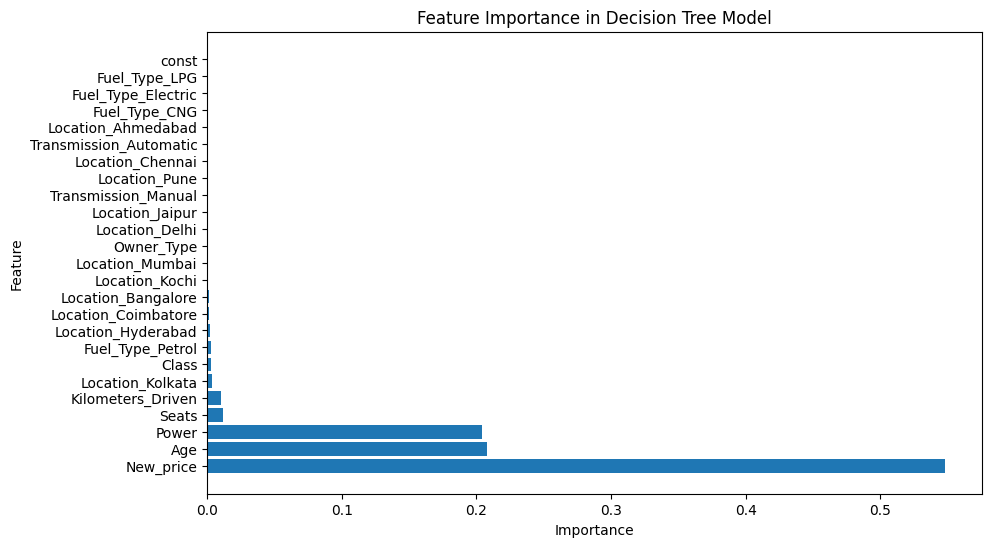

In [756]:
# Get feature importances
feature_importances = best_dt_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': x_train4.columns, 'Importance': feature_importances})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top N features (adjust N as needed)
N = 10  # Show top 10 features
print(importance_df.head(N))

# (Optional) Visualize feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Decision Tree Model")
plt.show()

####**Observations - Decision Tree**

**Key Insights**

* **Dominant Predictors:**  New_price stands out as the most influential predictor, accounting for over 54% of the feature importance. This suggests that the original price of the car has a substantial impact on its used car price, which aligns with intuition.
* **Age and Power:**  Age and Power are the next most important predictors, with roughly 20% importance each. This indicates that car depreciation and engine power significantly influence the price.
* **Other Factors:**  The remaining features have relatively low importance scores. Seats contributes about 1%, while Kilometers_Driven and some categorical variables like Location_Kolkata, Class, Fuel_Type_Petrol, and Location_Coimbatore have even smaller contributions.


**Interpretation in the Context of Used Car Prices**

* **New Price as Anchor:** The high importance of New_price suggests that the original price serves as a strong anchor for determining the used car price.
* **Depreciation and Performance:** Age reflects the expected depreciation of the car's value over time. Power indicates that more powerful cars command higher prices, likely due to their performance and desirability.
* **Other Factors:** While less influential, factors like the number of Seats, car Class, location (Location_Kolkata), fuel type (Fuel_Type_Petrol), and location (Location_Coimbatore) still play a role in determining the price.



### **Hyperparameter Tuning: Random Forest**

In [757]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=1)  # You can adjust n_estimators (number of trees)

# Fit the model to the training data
rf_model.fit(x_train4, y_train4)

# Make predictions on both training and test data
y_pred_train = rf_model.predict(x_train4)
y_pred_test = rf_model.predict(x_test4)

# Evaluate the model's performance
mse_train = mean_squared_error(y_train4, y_pred_train)
mse_test = mean_squared_error(y_test4, y_pred_test)
r2_train = r2_score(y_train4, y_pred_train)
r2_test = r2_score(y_test4, y_pred_test)

print("\nRandom Forest Regression Results:")
print("  Training Set:")
print(f"    MSE: {mse_train:.4f}")
print(f"    R-squared: {r2_train:.4f}")
print("  Testing Set:")
print(f"    MSE: {mse_test:.4f}")
print(f"    R-squared: {r2_test:.4f}")


Random Forest Regression Results:
  Training Set:
    MSE: 0.0045
    R-squared: 0.9919
  Testing Set:
    MSE: 0.0270
    R-squared: 0.9504


In [770]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],      # Number of trees in the forest
    'max_depth': [None, 5, 10, 25],           # Maximum depth of each tree (None = unlimited)
    'min_samples_split': [2, 5, 10, 25]       # Minimum number of samples required to split a node
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=1),
                           param_grid=param_grid,
                           cv=5,                     # 5-fold cross-validation
                           scoring='neg_mean_squared_error')  # Optimize for MSE

# Fit the grid search to your training data
grid_search.fit(x_train4, y_train4)

# Get the best model and its performance
best_rf_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Make predictions on the test data using the best model
y_pred_test = best_rf_model.predict(x_test4)

# Evaluate the best model on the test data
mse_test = mean_squared_error(y_test4, y_pred_test)
r2_test = r2_score(y_test4, y_pred_test)

print("\nBest Random Forest Model Performance on Testing Set:")
print(f"  MSE: {mse_test:.4f}")
print(f"  R-squared: {r2_test:.4f}")

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Best Random Forest Model Performance on Testing Set:
  MSE: 0.0270
  R-squared: 0.9504


In [771]:
rf_train1 = model_performance_regression(grid_search, x_train4, y_train4)
rf_train1

RMSE      MAE  R-squared  Adj. R-squared      MAPE
0  0.06647  0.04529   0.992088        0.992046  2.537738

In [772]:
rf_test1 = model_performance_regression(grid_search, x_test4, y_test4)
rf_test1

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.164309  0.116241   0.950411        0.949336  6.498866

**Feature Importance**

                Feature  Importance
3                 Power    0.389126
5             New_price    0.340587
6                   Age    0.201401
1     Kilometers_Driven    0.017155
4                 Seats    0.011889
7                 Class    0.010590
22     Fuel_Type_Petrol    0.004765
16     Location_Kolkata    0.003857
13   Location_Hyderabad    0.003335
11  Location_Coimbatore    0.002065


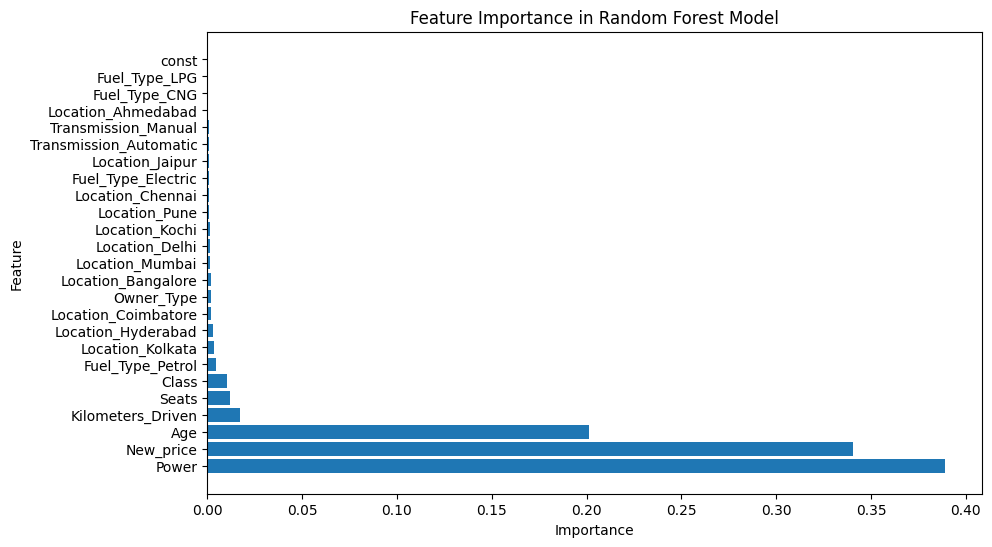

In [773]:
# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': x_train4.columns, 'Importance': feature_importances})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top N features (adjust N as needed)
N = 10  # Show top 10 features
print(importance_df.head(N))

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.show()

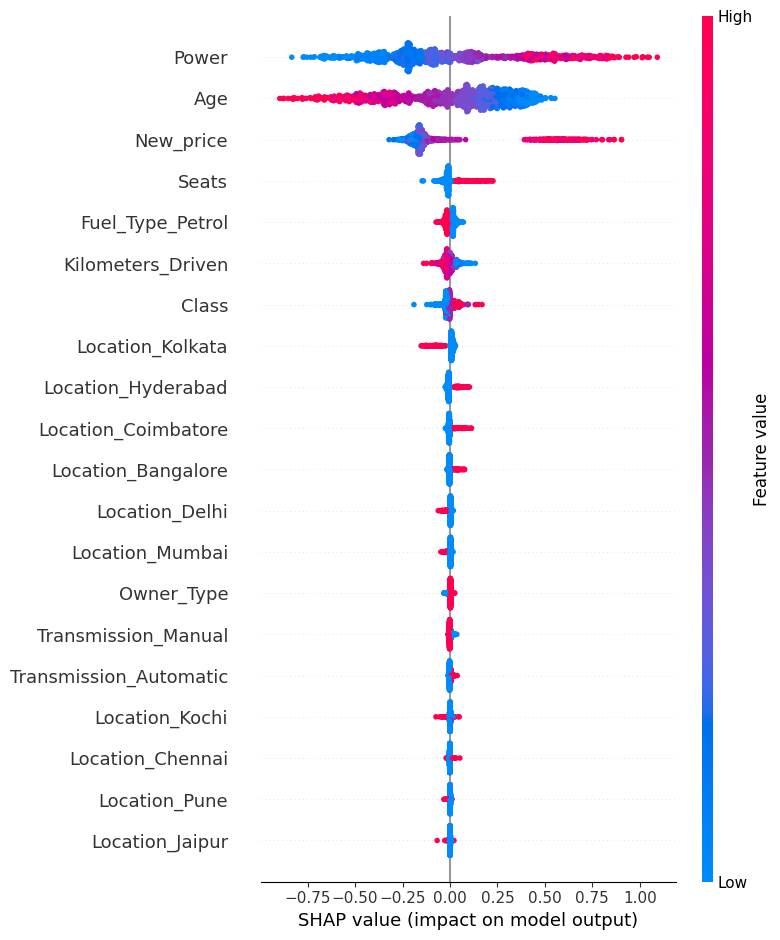

In [774]:
# Try examining SHAP values to get a different perspective on feature importance.
!pip install shap -q
import shap

explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(x_test4)  # Using test data here

shap.summary_plot(shap_values, x_test4)

####**Observations - Random Forest**
**Dominant Predictors:**

* **Power:** Engine power emerges as the most influential factor, accounting for nearly 39% of the feature importance. This suggests that buyers in the used car market place a high value on performance and engine capabilities.
* **New_price:** The original price of the car is the second most crucial factor, explaining about 34% of the variance. This highlights the strong anchoring effect of the original price on the used car market.
* **Age:** The car's age contributes around 20% to the prediction, confirming the expected depreciation of value over time.

**Secondary Factors:**

* **Kilometers_Driven and Seats:** These factors have a relatively minor impact on the price compared to the top three. However, they still play a role in determining the value, suggesting that buyers consider mileage and seating capacity when making decisions.

**Location & Fuel Type:**

* **Location_Kolkata** This specific location seems to negatively impact the price compared to other locations.
* **Fuel_Type_Petrol:** Petrol cars might be slightly less valued compared to other fuel types (which could be the baseline category in the model).
* Other locations and fuel types have minimal influence on price based on this model.

## **Conclusions and Recommendations**

###**Comparison of Models**


In [779]:
# Generate a table that summarizes RMSE, MAE R-squared, Adjusted R-squared and
# MAPE for lin_reg_test1, lin_reg_test2. lin_reg_test3, lin_reg_test4

# Create a list of your DataFrames (along with their names)
models = [
    ('Linear Reg', lin_reg_test4),
    ('Ridge Reg', ridge_test1),
    ('Lasso Reg', lasso_test1),
    ('Decision Tree', dt_test1),
    ('RandomForest', rf_test1)
]

# Concatenate all DataFrames into one, preserving the names
all_metrics = pd.concat({name: df for name, df in models}, names=['Model'])

# Reset the index to make 'Model' a regular column, avoiding duplicate column name
all_metrics = all_metrics.reset_index(level=1) # Reset only the inner level of the index

# Drop the 'level_1' column
all_metrics = all_metrics.drop(['level_1', 'Model'], axis=1)

# Display the table
print(all_metrics)

                   RMSE       MAE  R-squared  Adj. R-squared       MAPE
Model                                                                  
Linear Reg     0.223369  0.168272   0.908356        0.906369   9.475470
Ridge Reg      0.231460  0.173189   0.901597        0.899463   9.824565
Lasso Reg      0.264678  0.195027   0.871325        0.868535  11.019747
Decision Tree  0.207171  0.150707   0.921166        0.919456   8.451815
RandomForest   0.164309  0.116241   0.950411        0.949336   6.498866


The table above summarizes the five best performing models we built.  Based on these results, we can see that the **decision tree models** (particularly Random Forest) provide us with significant benefits.  

The advanatages of **Decision Trees** are:

* **Handles Non-Linearity:** Decision trees can capture non-linear relationships between predictors and the target variable (car price), which linear regression struggles with.  We are seeing a lot of this in our data.  This is crucial in the used car market, where factors like age and mileage might have diminishing returns on price.
* **Handles Interactions:** Decision trees automatically model interactions between predictors, capturing how the effect of one predictor depends on the value of another. This is useful for capturing complex dependencies, like how the impact of mileage might vary for different car makes or models.
* **Categorical Variables:** Decision trees handle categorical variables naturally without requiring explicit one-hot encoding or other transformations. This simplifies the preprocessing step.
* **Interpretability:** The tree structure provides a visual and intuitive representation of the decision-making process, making it easier to understand how the model arrives at its predictions.

The disadvanatages of **Decision Trees** are:

* **Prone to Overfitting:** Decision trees can easily overfit the training data, leading to poor generalization on new, unseen data. This is especially true if the tree is allowed to grow deep and complex.
* **Instability:** Small changes in the training data can lead to significantly different tree structures, making the model less stable.
* **Difficulty with Extrapolation:** Decision trees struggle to make predictions outside the range of values seen in the training data.

If accuracy is our number one goal, the **Random Forest** model appears to be the best choice for predicting used car prices in our dataset. It provides the most accurate predictions and generalizes well to unseen data.

Above Decision Trees, **Random Forests** have the following additional advantages:

* **Improved Generalization:** By combining multiple decision trees (ensemble), random forests reduce overfitting and improve generalization to new data.
* **Reduced Variance:** Random forests are less sensitive to noise and fluctuations in the training data compared to a single decision tree.

The disadvanatages of **Random Forests** are:

* **Reduced Interpretability:** While individual trees are interpretable, the combined predictions of a random forest can be more challenging to understand.
* **Computationally Expensive:** Training and prediction can be more computationally demanding compared to linear regression, especially for large datasets or many trees.


**Refined Insights**

* **Significant Predictors:** In pretty much all our modeling, the most relevant features that affect the price of a used car are New_price, Age and Power. The sales organization should emphasize these features while negotiating with customers and we should focus on maximizing inventory based on these factors.
* **Secondary Factors:**
  * To a lesser dregree, the number of seats (i.e. size of the car) and Class help increase the price and therefore profits.
  * Certain markets such as Bangalore, Coimbatore tend to sell at a higher prices.  
  * KM driven tends to lower the value of a car.  We should develop sales strategies to lower the number of highly driven vehicles on our lots.
  * The Kolkata market tends to sell at lower prices.  We should use caution expanding the business in this market without carefully weighing the profit margins.
* **Alternate Energy Vehicles:** There is **very** little data for Electric, CNG and LNP cars.  Therefore it is almost impossible for the any of our modeling to reliably predict prices for these.  If we determine these are emerging markets, we should get more data.
* **Generalized Data:** A lot goes into the price of a used car.  Certain features that we do not have data for (e.g. Navigation, Sunroof, AWD) can affect the resale value of a car.  Collecting this type of additional data would likely improve our price prediction.
* **Missing data:** In the models we are comparing above, we imputed a lot of  Mileage, Engine, Power, Seat and New_price data and dropped 19% of our data where we had no Price data or New_price data.  Exploring ways to eliminate our missing data at the source will likely improve our model performance.



**Proposal for the final solution design**

Our proposal is to use the Random Forest Model.  There are multiple reasons for this:

* **Excellent Performance:** Our Random Forest model shows outstanding performance on the testing set.

  It explains 95% of the variance in used car prices, which is a very strong fit.  In comparison to our other models (Linear Regression, Ridge, Lasso, Decision Tree), this Random Forest model seems to be the best-performing.
* **Complex Data:** Random Forests can capture non-linear relationships between predictors which we have in our data.
* **Ensemble Nature:** The ensemble nature of Random Forest helps increase confidence while mitigating overfitting.
*  **Computational Cost** As noted earlier, one of the general concerns with random forest models is they are computationally expensive because they utilize lots of randomness while building multiple trees.  Currently this is not a concern on our data set as it is quite small and it only takes ~3 minutes to fit the model.  I think we can absorb that.  
* **Future Refinement:** There other hyperparameters (e.g., min_samples_leaf, max_features) and additional complex techniques (e.g. stacking or blending additional models) which could be explored should the performance of this model ever come into question.

####**How do we use this model?**

**Actual vs Predicted Plot**

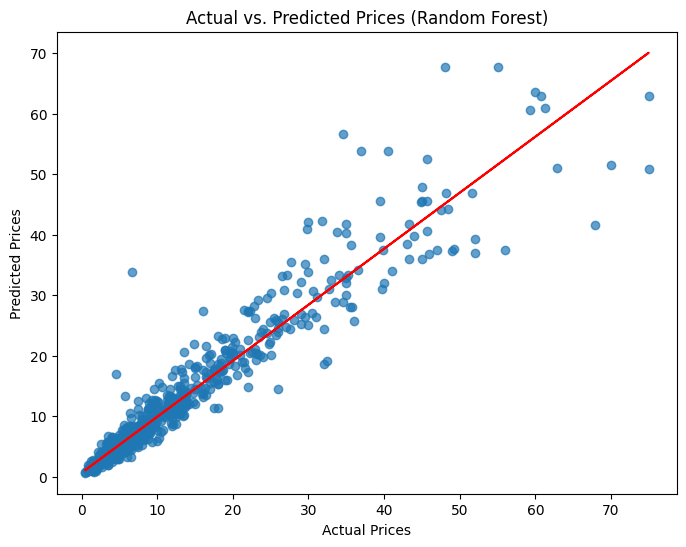

In [776]:
# Remember we used no.log to log transform the prices so we need to exp to reverse our log transformation.

# Reverse the log transformation
actual_prices = np.exp(y_test4) - 1
predicted_prices = np.exp(y_pred_test) - 1

plt.figure(figsize=(8, 6))
plt.scatter(actual_prices, predicted_prices, alpha=0.7)

# Add a trend line (using the transformed values)
z = np.polyfit(actual_prices, predicted_prices, 1)
p = np.poly1d(z)
plt.plot(actual_prices, p(actual_prices), color='red')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices (Random Forest)")
plt.show()


**A Specific Data Point Prediction**

In [777]:
# Create a DataFrame with the car's features
car_data = pd.DataFrame({
    'Kilometers_Driven': [40000],
    'Power': [140.8],
    'Seats': [5],
    'New_price': [128.000],
    'Age': [11],
    'Fuel_Type': ['Diesel'],
    'Transmission': ['Automatic'],
    'Owner_Type': ['Second'],
    'Class': [3],
    'Location': ['Coimbatore']
}, index=[0])

# One-hot encode categorical variables (assuming you did this during training)
car_data_encoded = pd.get_dummies(car_data, columns=['Fuel_Type', 'Transmission', 'Owner_Type', 'Class', 'Location'])

# Align columns with training data (ensure all columns from training are present, even if they are 0 for this car)
car_data_encoded = car_data_encoded.reindex(columns=x_train4.columns, fill_value=0)

# Make the prediction
predicted_price = best_rf_model.predict(car_data_encoded)

# Back-transform to the original price scale (exponentiate)
predicted_price = np.exp(predicted_price) - 1

print(f"Predicted Price for 2013 Audi A4: {predicted_price[0]:.2f}")

Predicted Price for 2013 Audi A4: 16.89


In [778]:
# Assuming your DataFrame is named 'data' and has a column 'Name'
data[data['Name'].str.contains('Audi')].head(1)


Name    Location  Kilometers_Driven Fuel_Type  \
4  Audi A4 New 2.0 TDI Multitronic  Coimbatore              40670    Diesel   

  Transmission Owner_Type  Mileage  Engine  Power  Seats  New_price  Price  \
4    Automatic     Second     98.4  1968.0  140.8    5.0      128.0  17.74   

   Make                       Model  Age  Class  
4  Audi  A4 New 2.0 TDI Multitronic   11      3

The predicted price for a similar KM driven Audi A4 in the same used car market (Coimbatore) is **16.97** (vs 17.74) which is within 5% error of the actual value.
